<a href="https://colab.research.google.com/github/KarenYu729/HDFS-AWS-S3-lab/blob/main/HDFS_%26_AWS_S3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Open an AWS Academy Learner Lab

You might need to get an invitation from your teather first.

1. Go to https://awsacademy.instructure.com

1682108210264.png

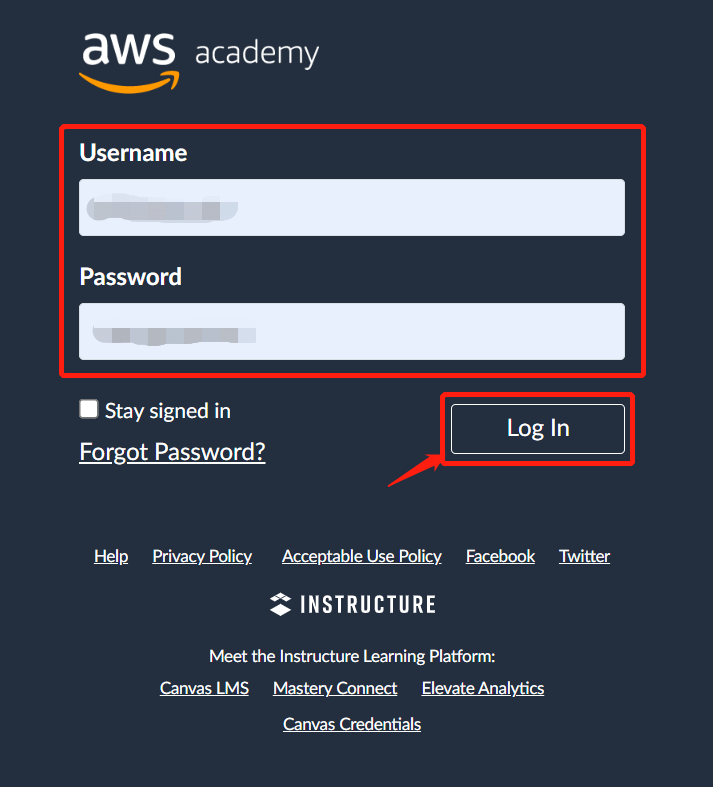

2. Go to our course.

1682108582572.png

3. Click on Modules on the left hand side

1682108684414.png

4. Click on Learner Lab - Associate Services
5. Refresh the web page, if it is blank
6. Agree to the Terms and Conditions
7. If you get the message “labs.vocareum.com refused to connect”, it means you need to enable third
party cookies for this site while you are working on the lab
8. READ THE ENTIRE PANEL ON THE RIGHT. This panel contains important information about connecting to AWS instances, once created. Pay particular attention to the sections:

    • Accessing EC2 Instance(s)

    • SSH access to an EC2 Instance you launch. Note that we will NOT use putty to connect to our AWS instance from PCs. Instead, we will use Sagemaker (see below).
    • Preserving your budget


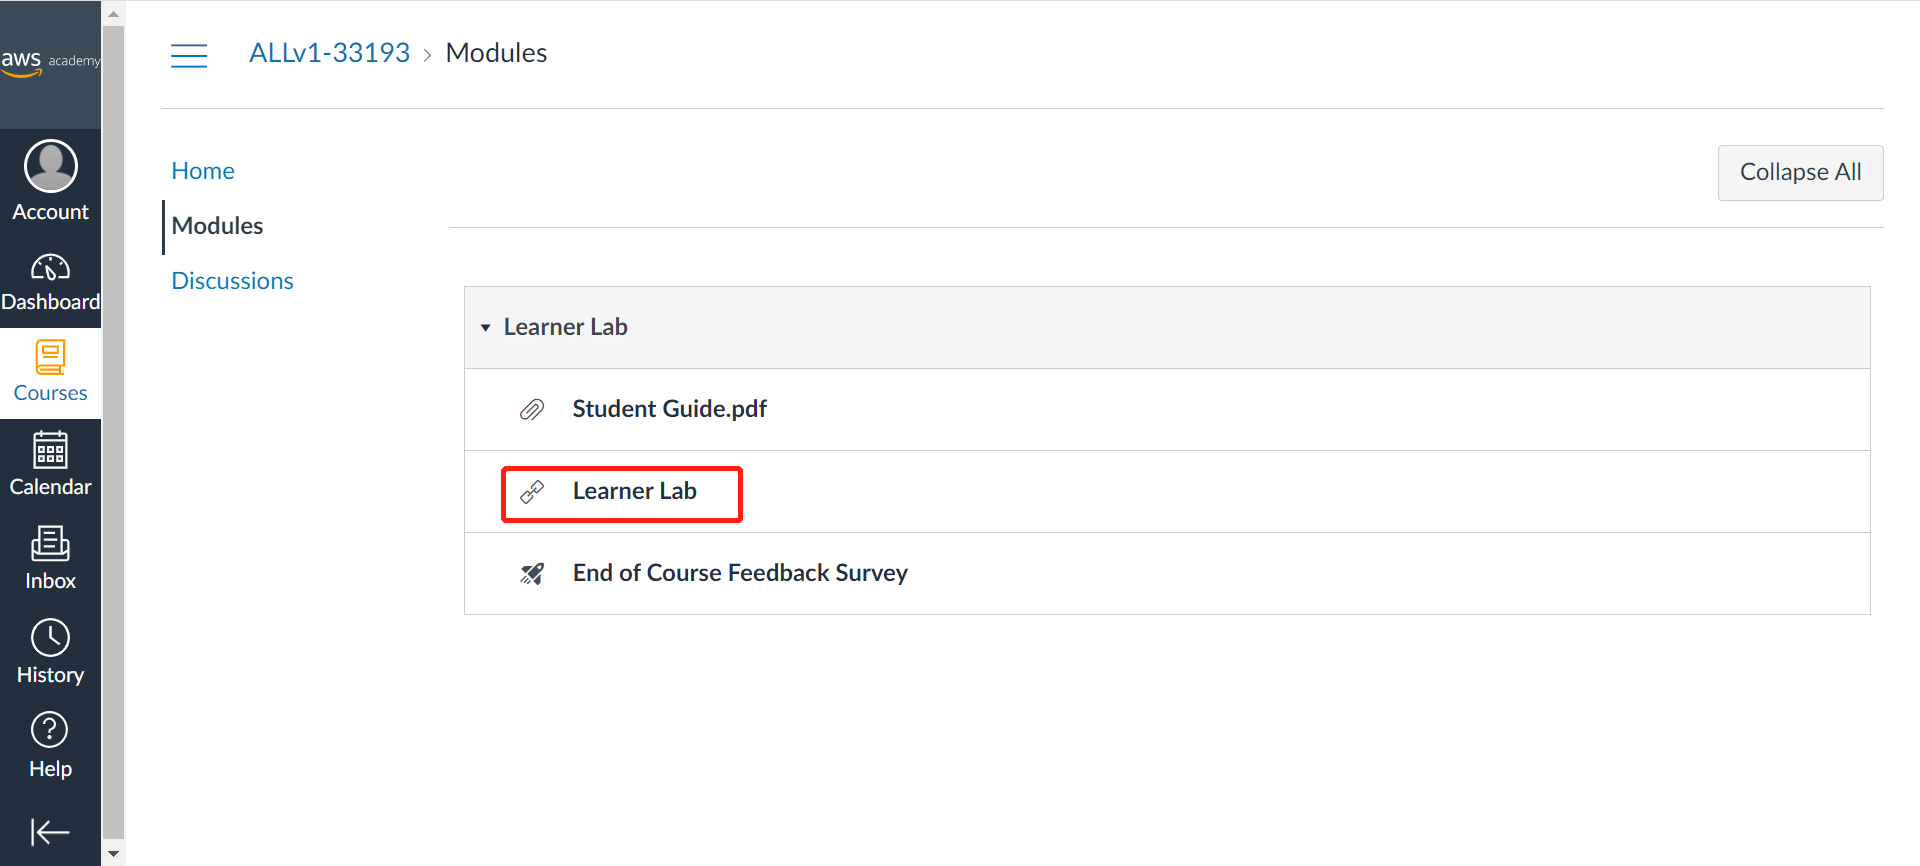

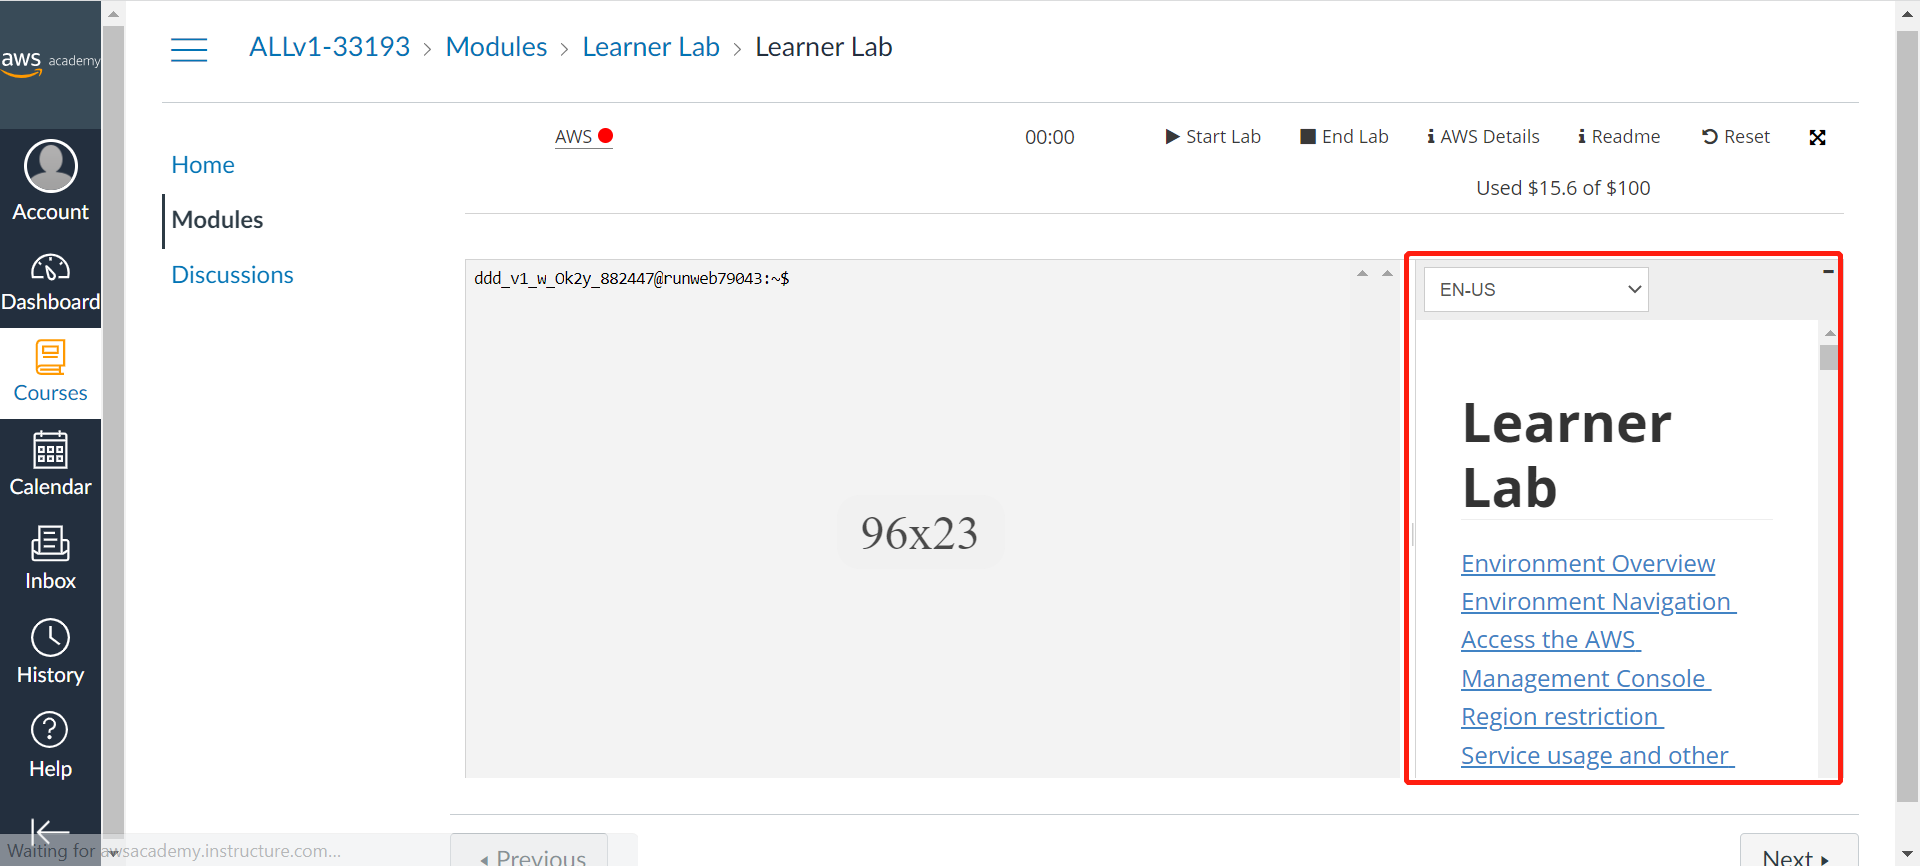

9. Click “Start Lab”. Starting the lab should take about a minute.


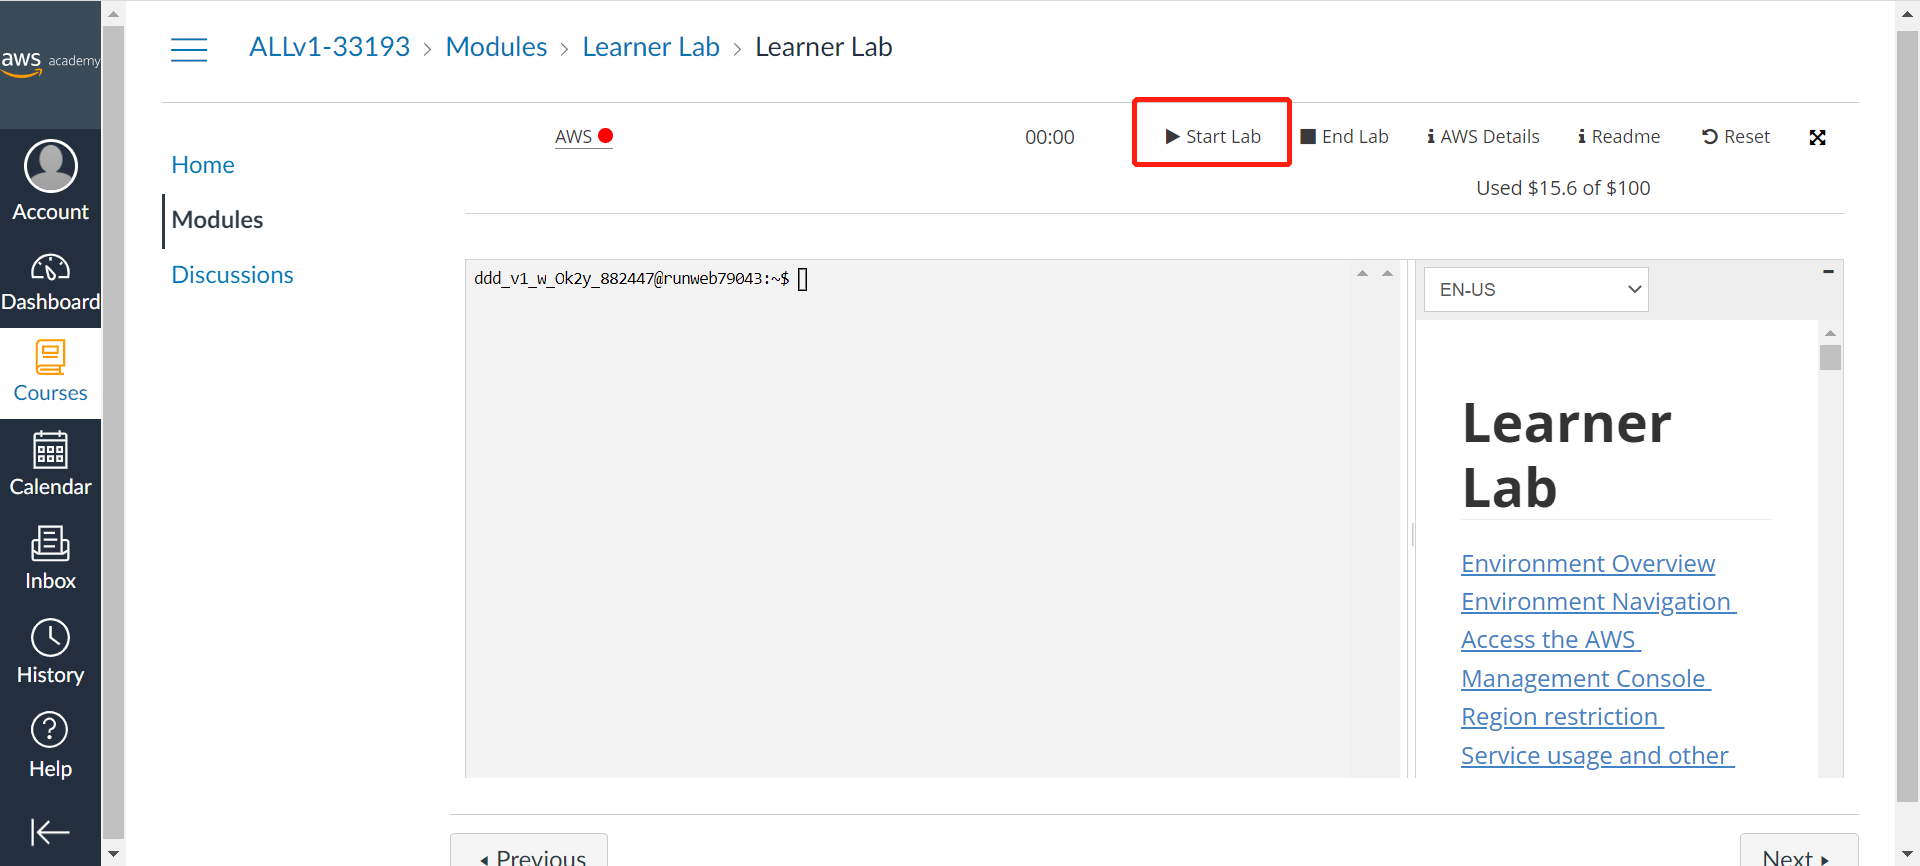

10. Click the AWS button, once there is a green dot next to it.

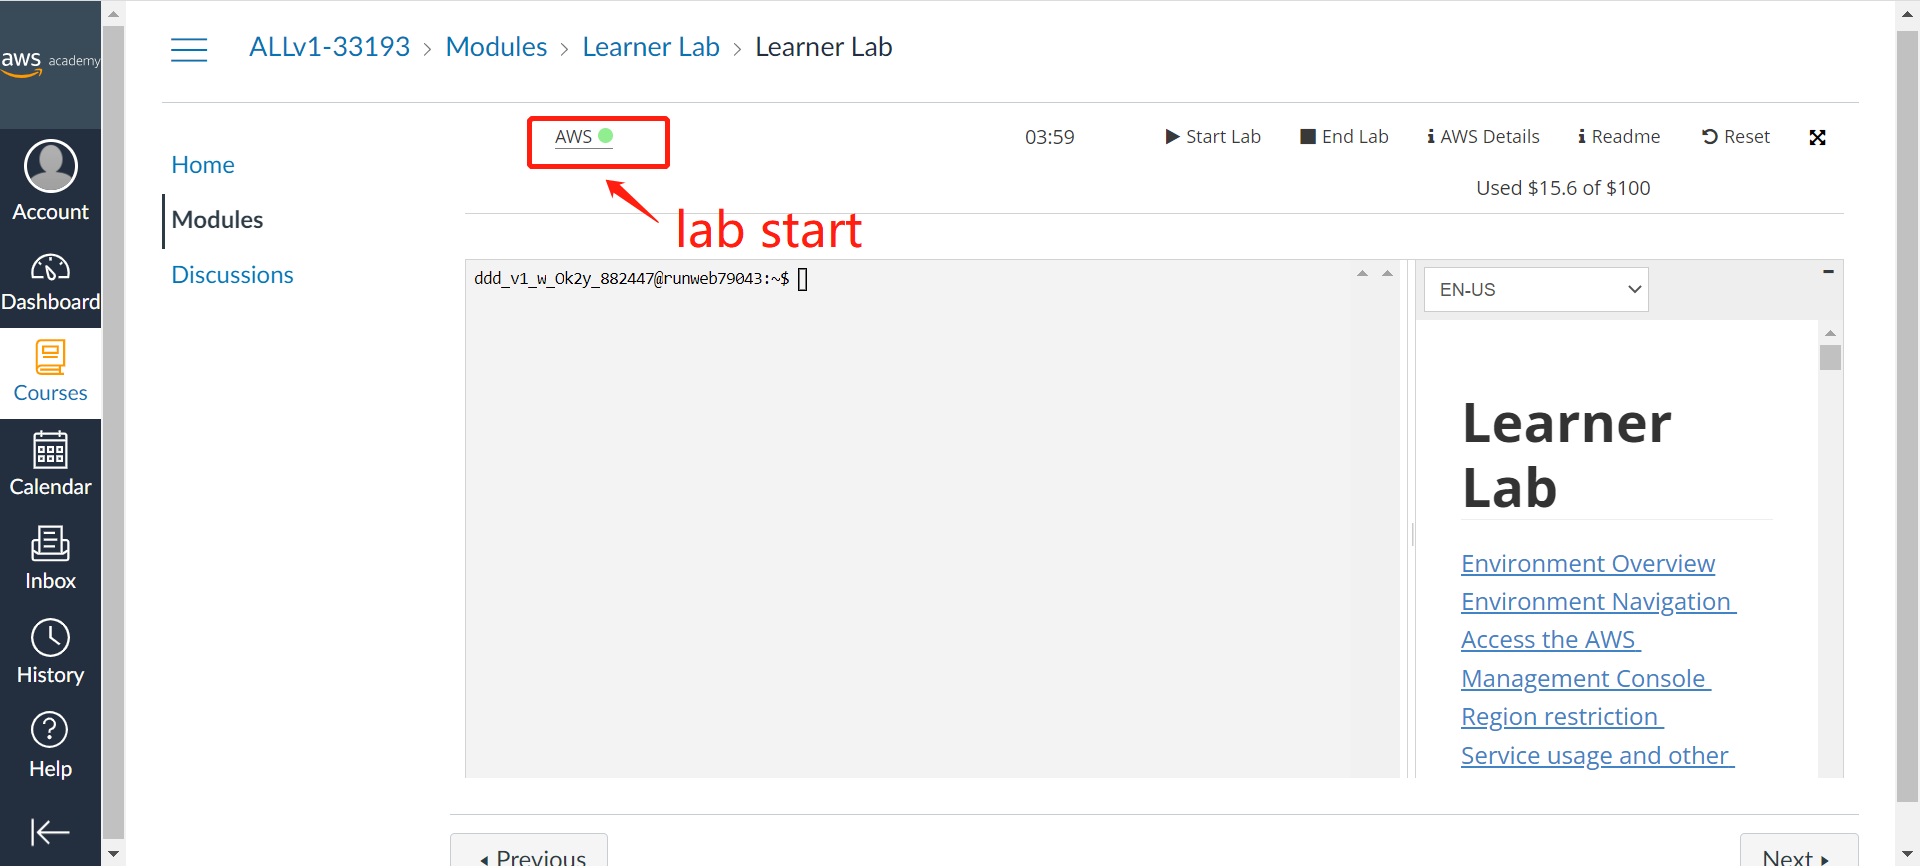

# Download your Key Pair

To connect to the cluster you will create later, you need a Key Pair as an identity.
1. From the lab menu bar, click on AWS Details. 
2. On the right hand side of your screen, click on “Download PEM” (both Mac/Linux and PC users).

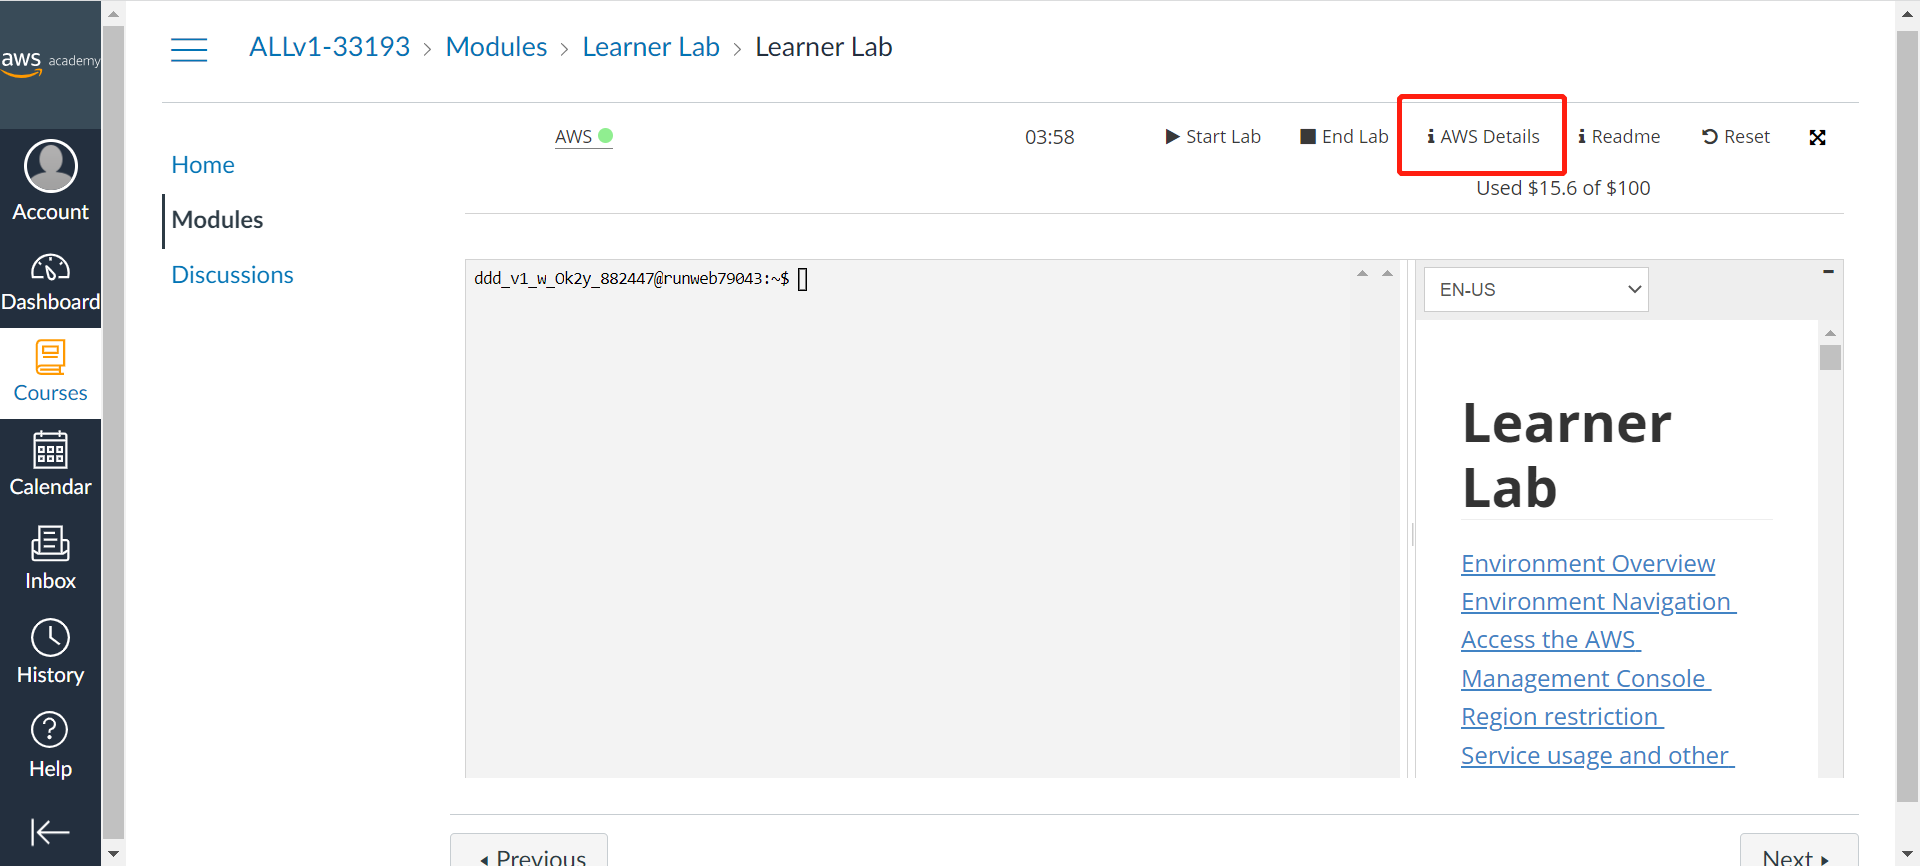

1682109236416.png

1682109257754.png

# Start Up a Cluster

1. Click AWS at the upper left of the dashboard to get back to the main menu. Then, search for or click
“EMR”. This stands for “Elastic Map Reduce”
2. Make sure that the current region is “N. Virginia” (top menu bar on the right)
3. Click the blue “Create cluster” button

1682109383475.png

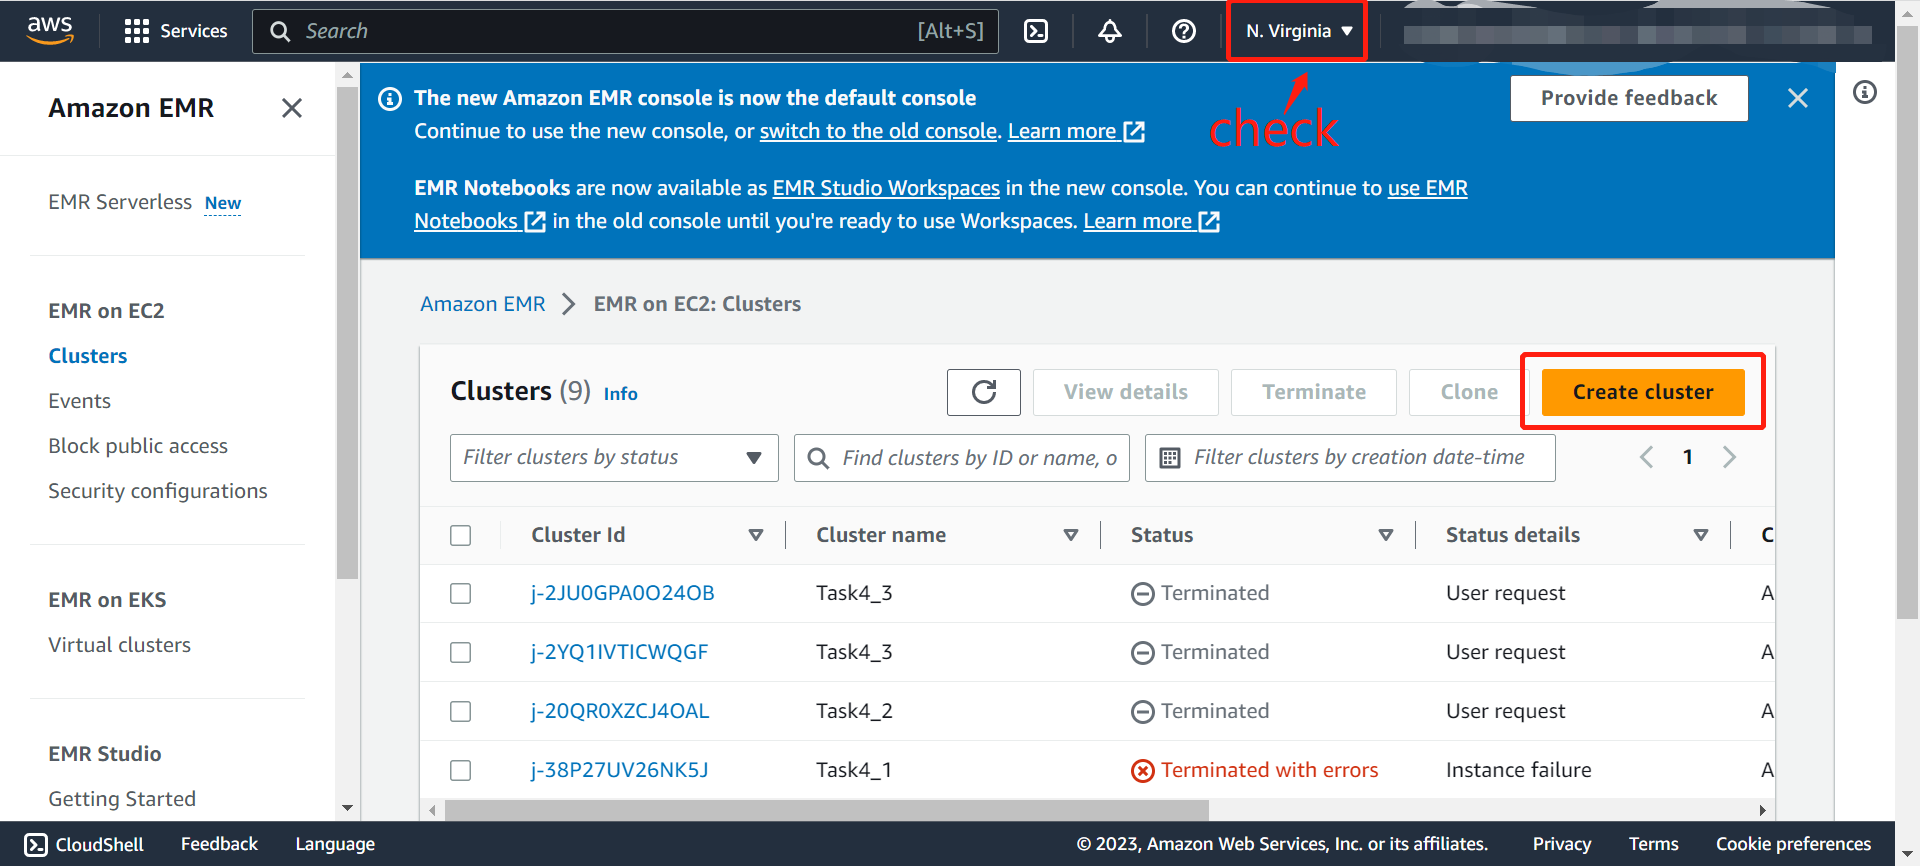

4. set up cluster

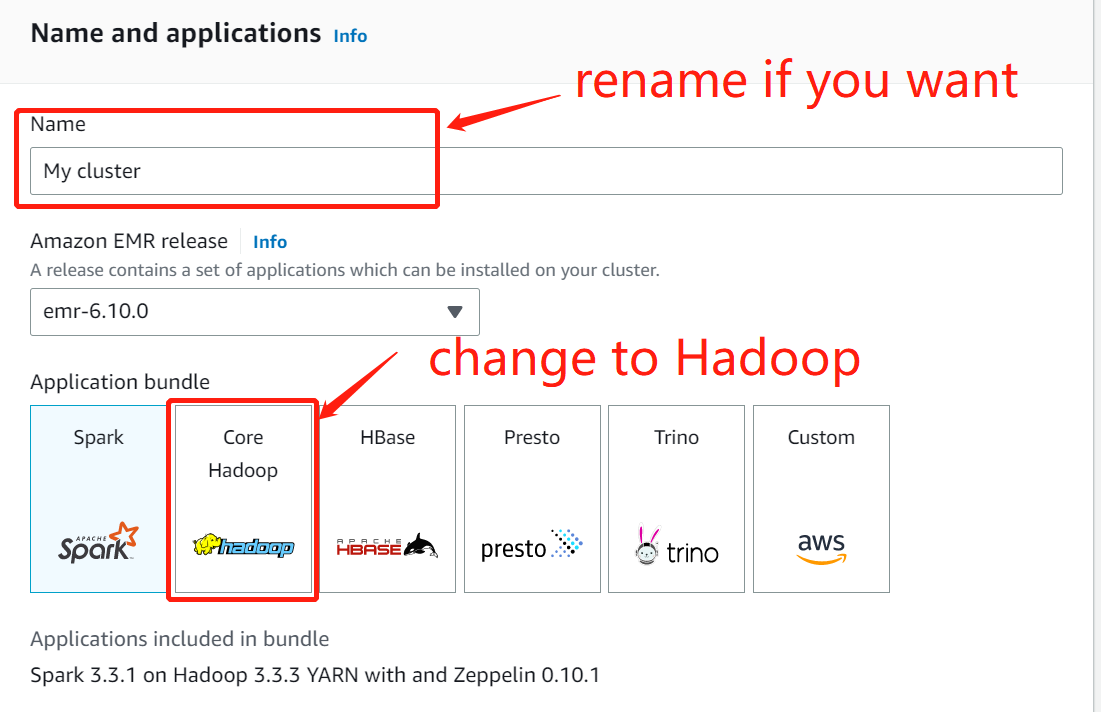

1682109693135.png

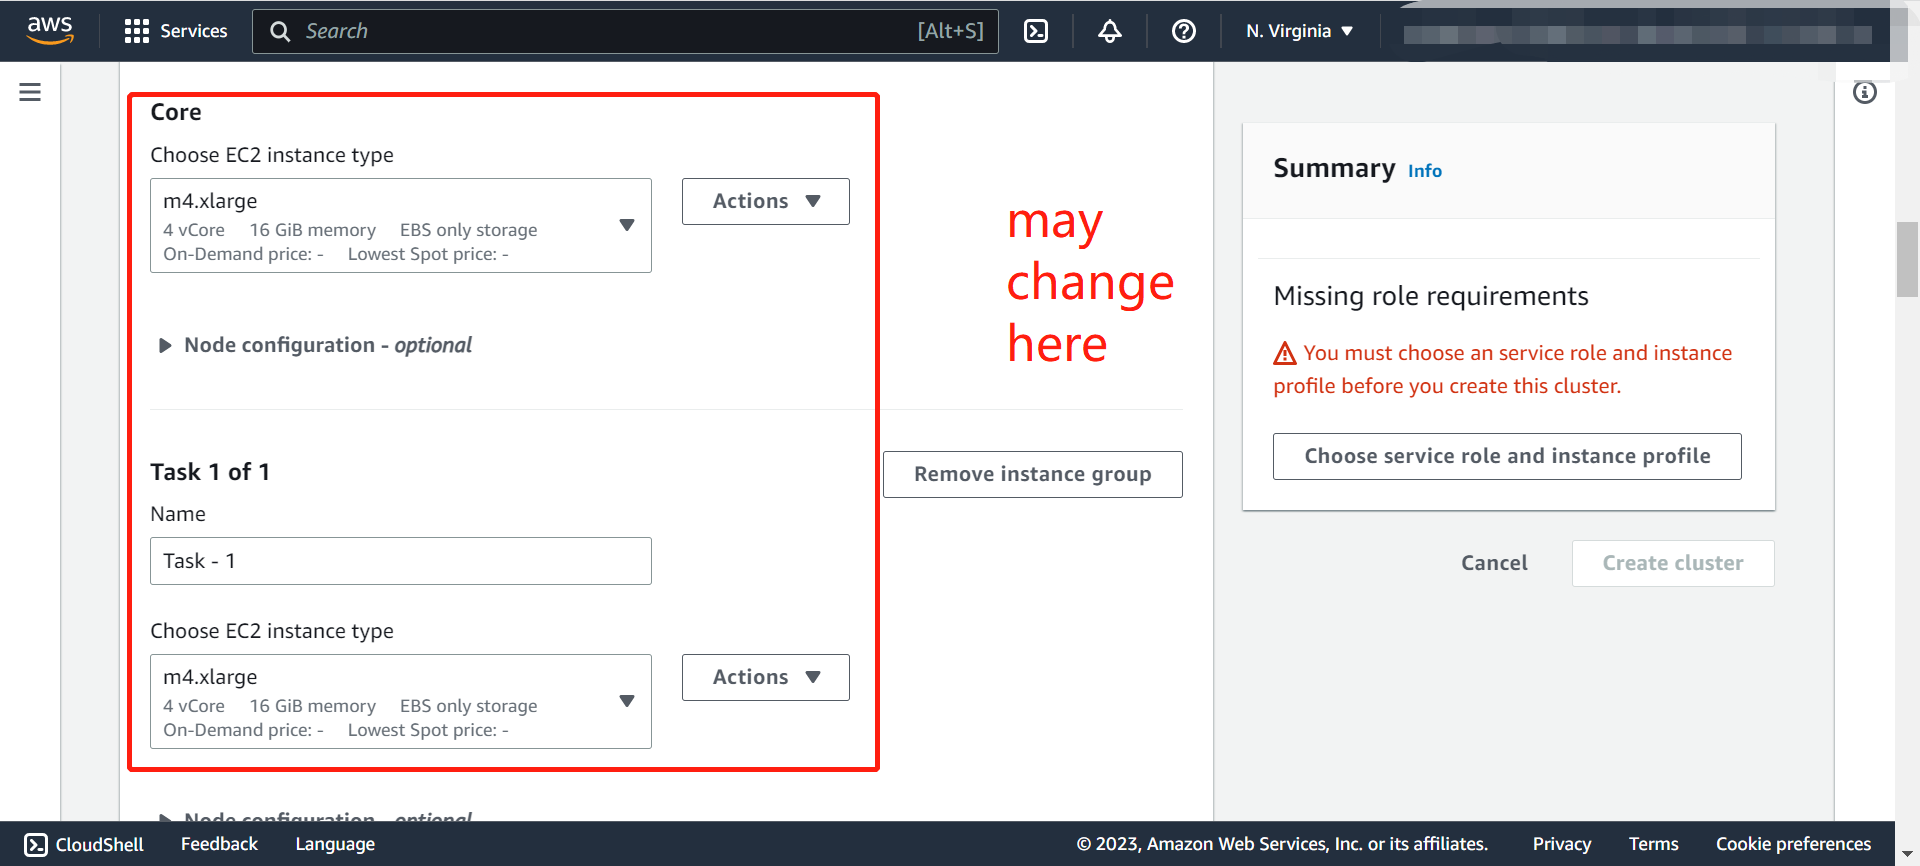

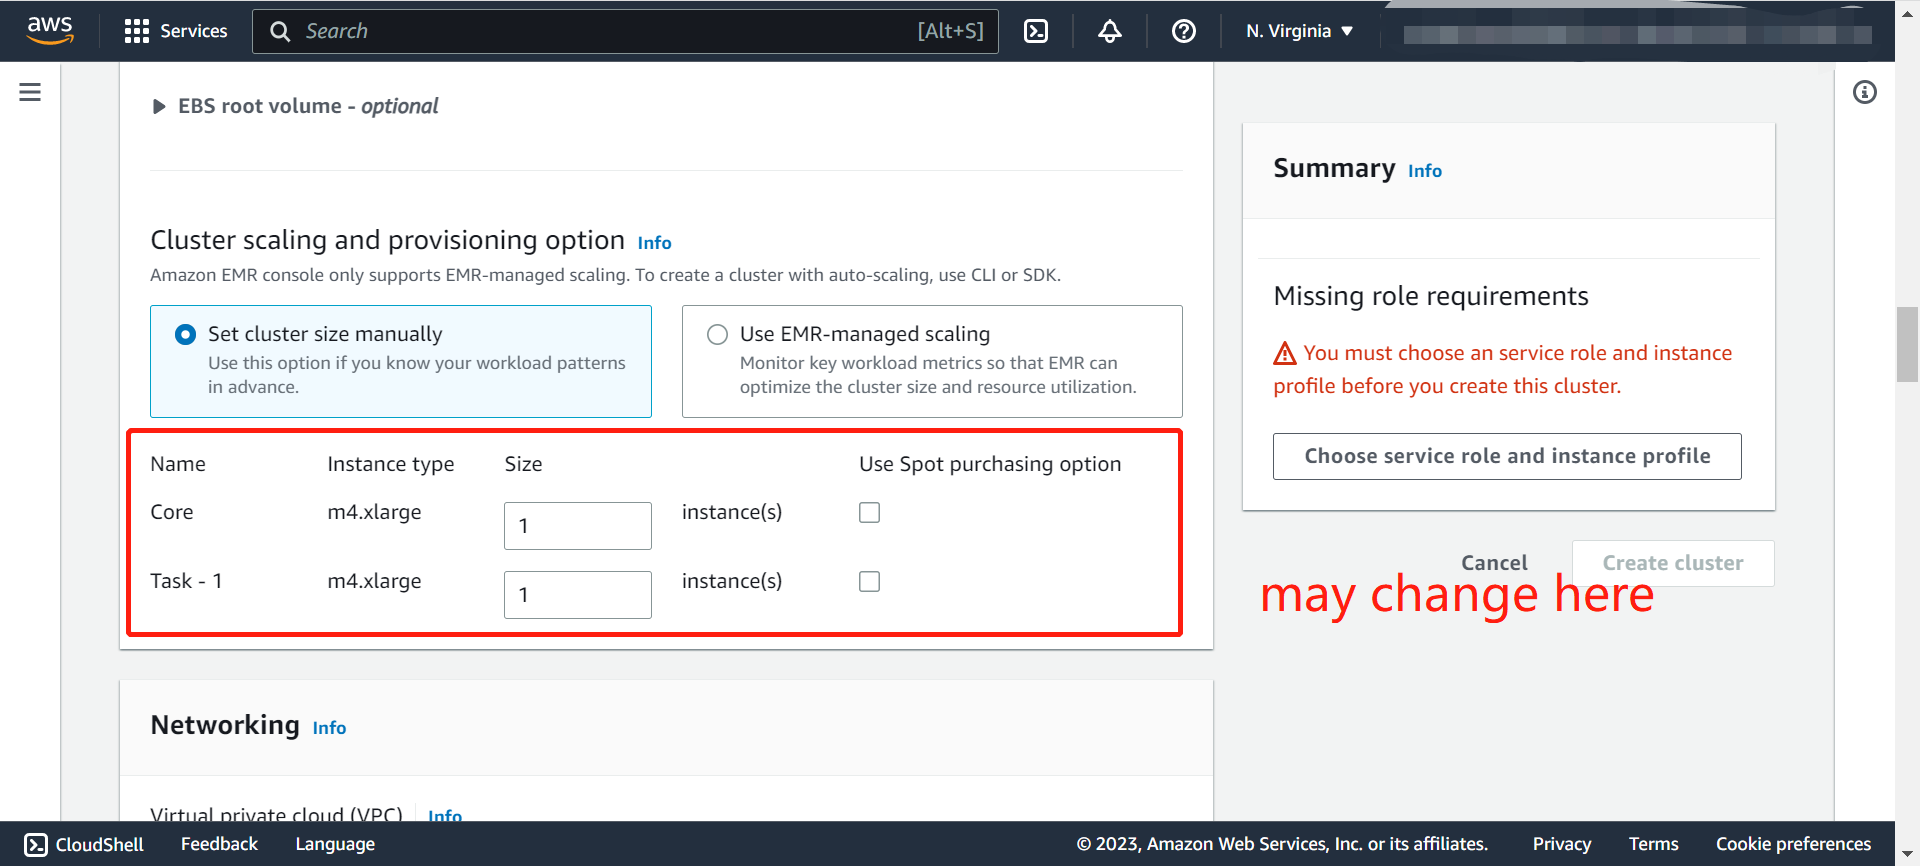

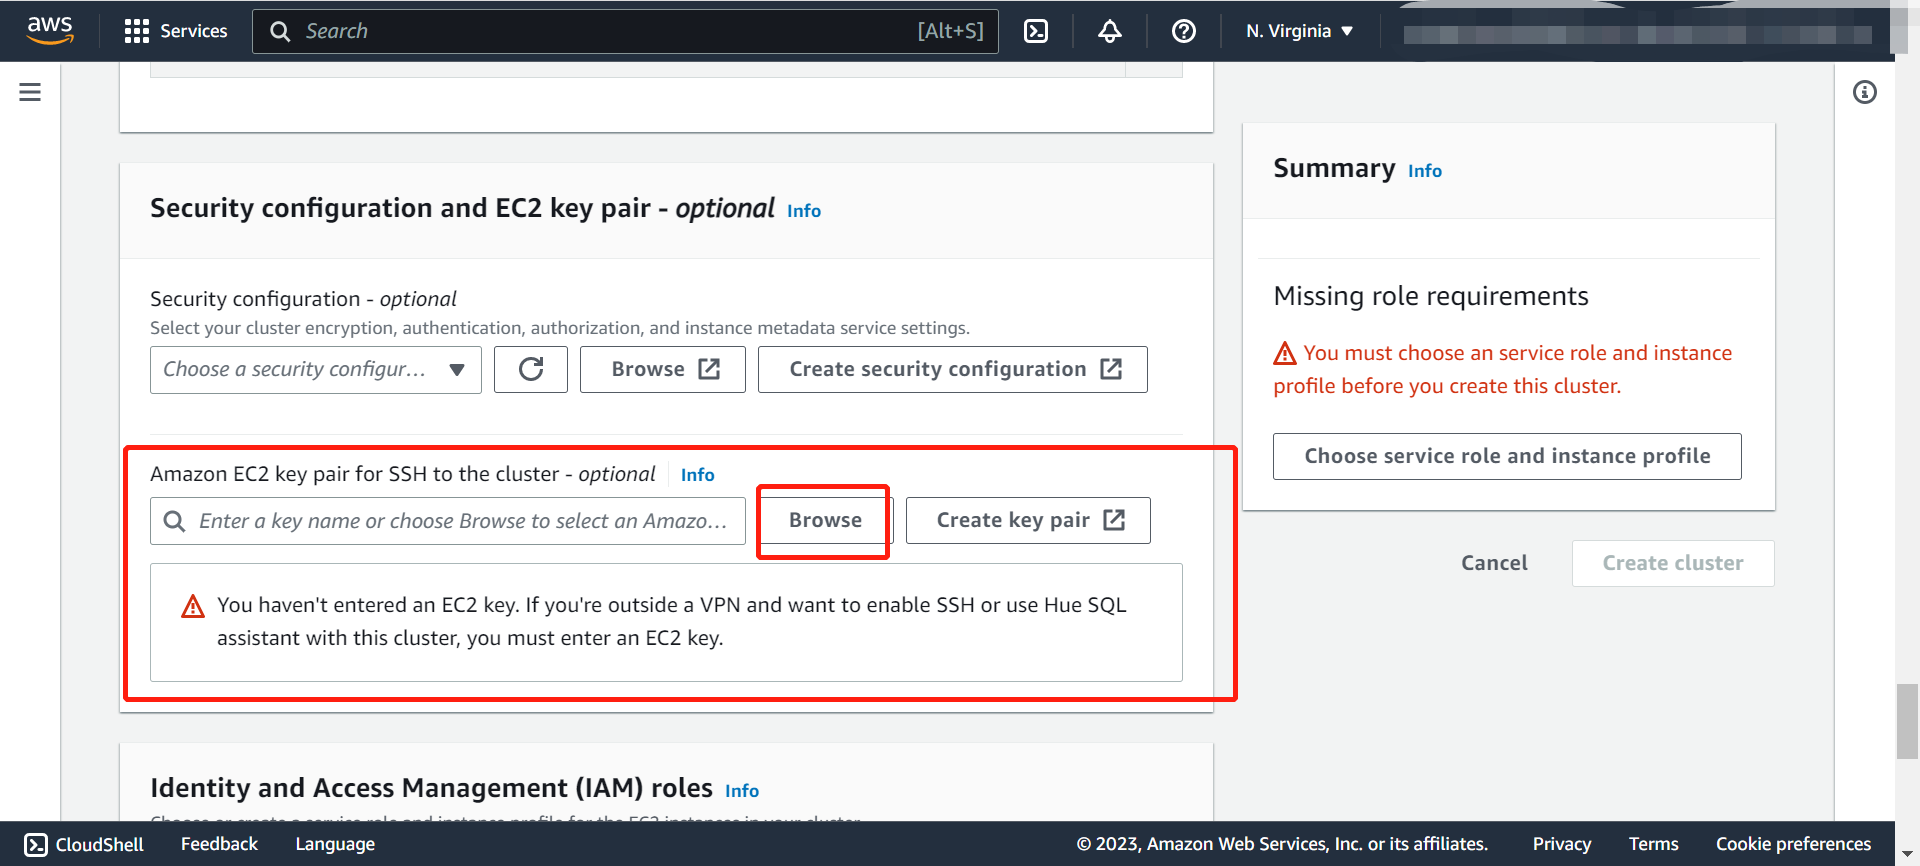

1682110045739.png

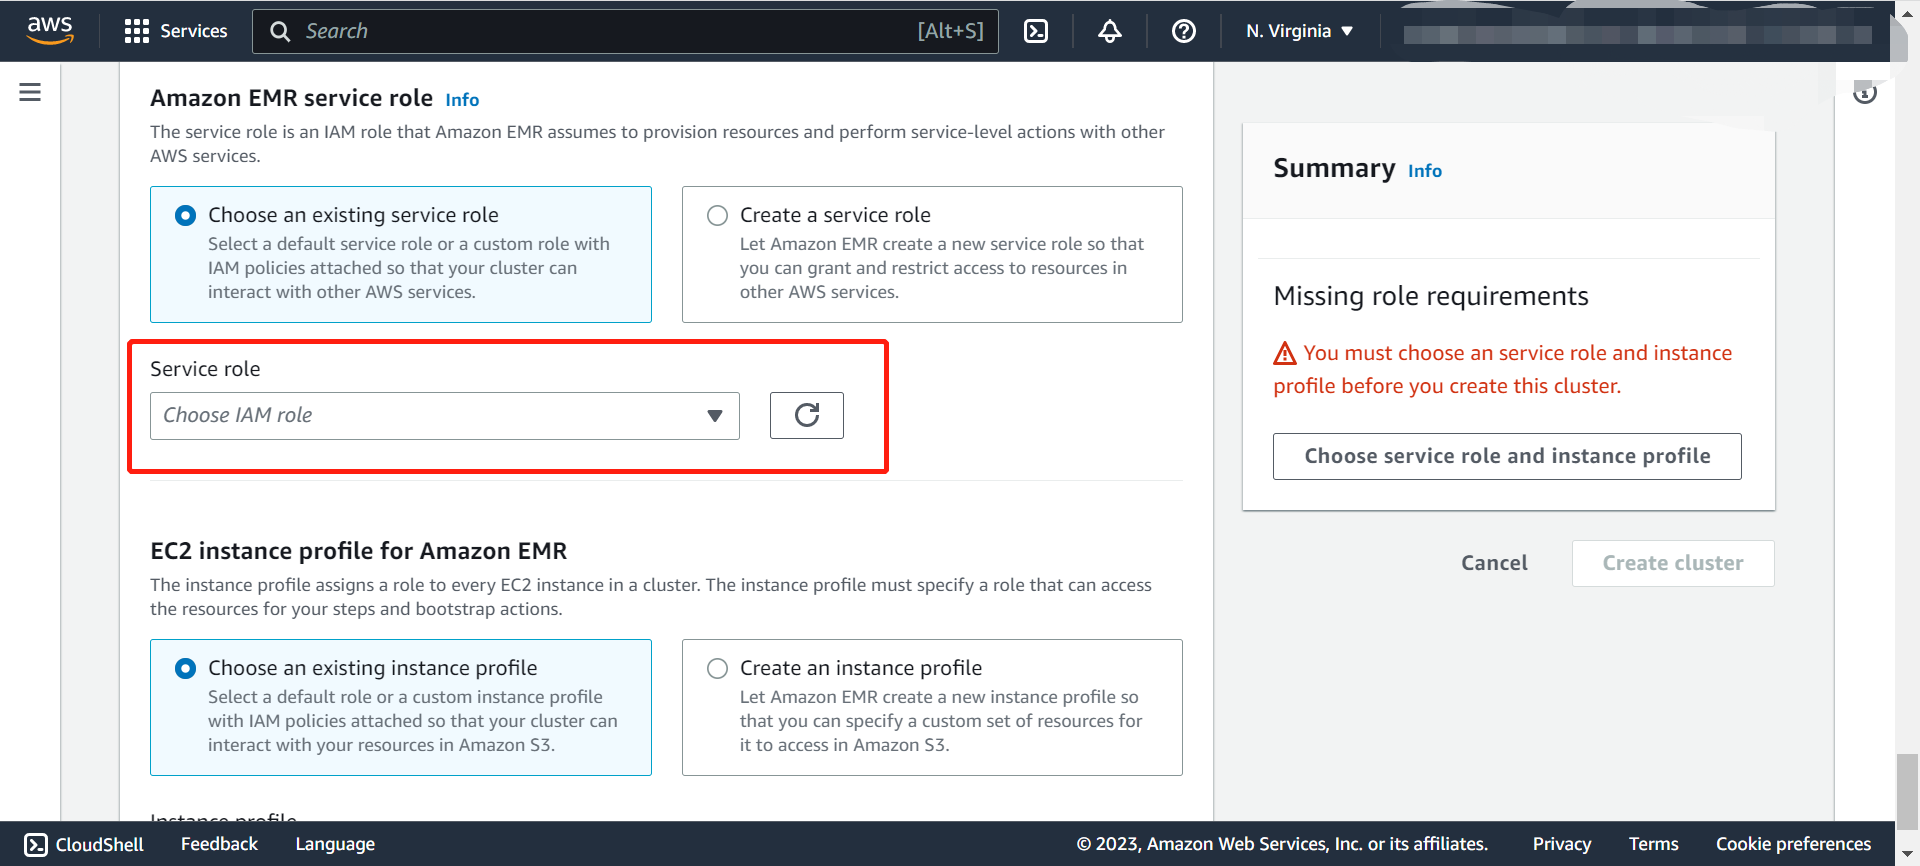

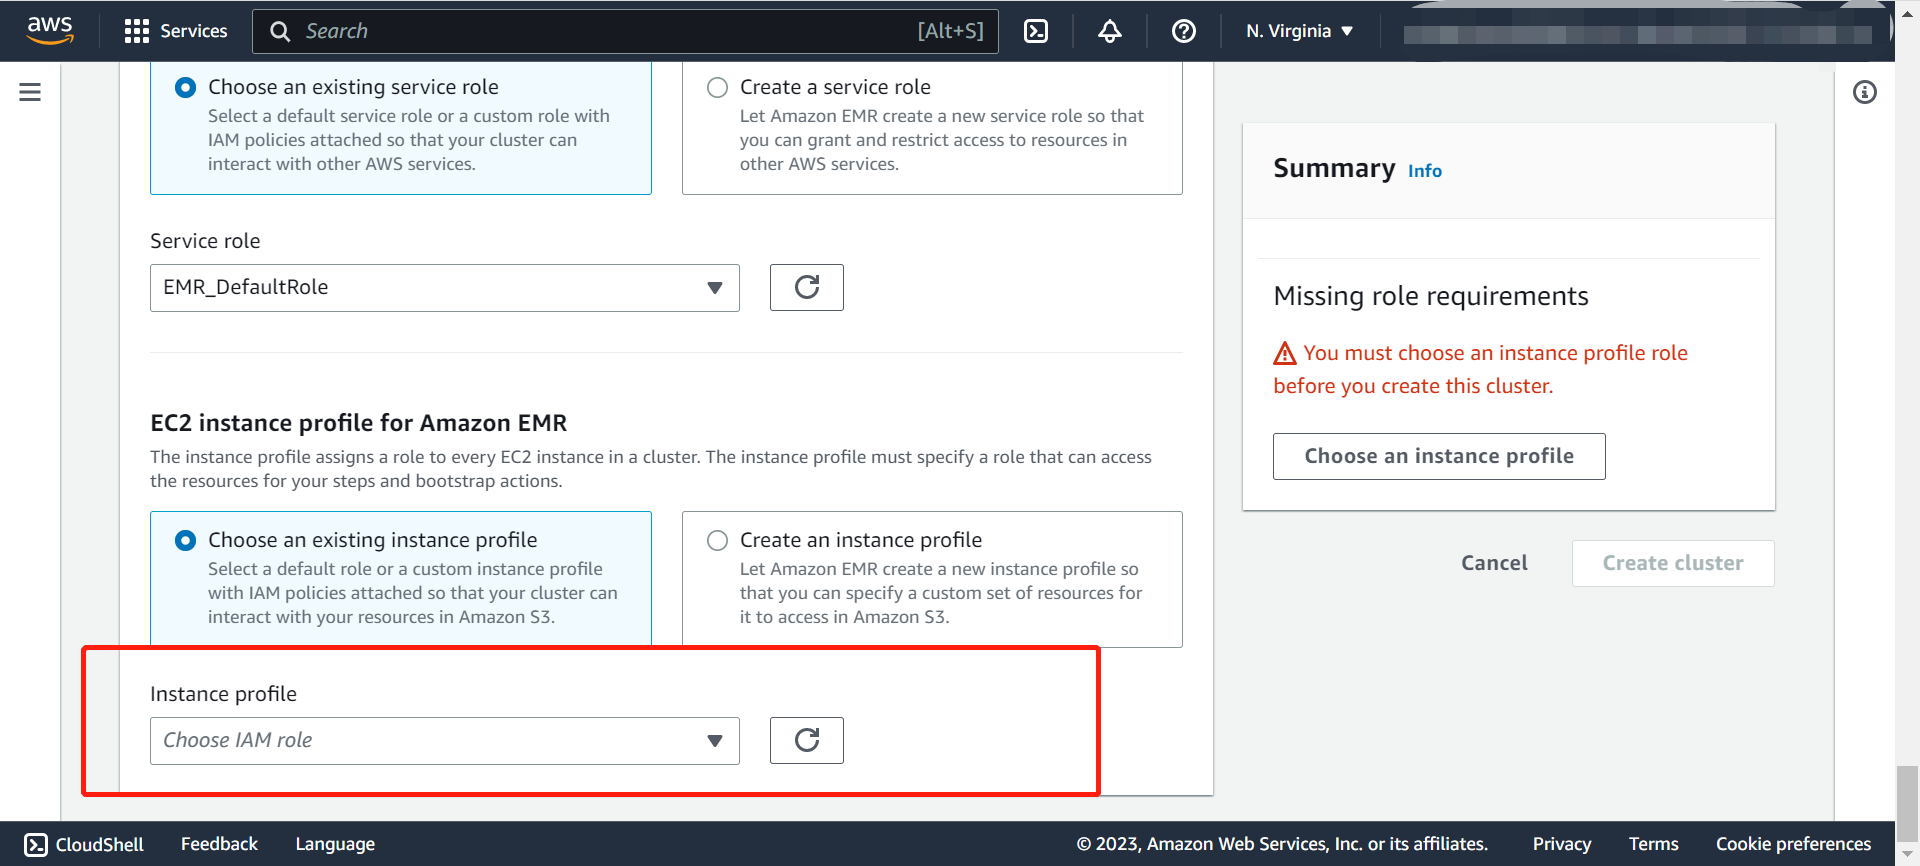

5. Click the blue “Create Cluster” button. Now your machines are being provisioned in the cloud! You will be taken to a page that will display your clusters.You can check the status of your cluster by first clicking on the “Clusters” link on the left side menu and then clicking the little circular update arrow at the top right. As soon as you create the cluster, the status is “Starting” (look for the green text), which means it is working on making your cluster online. After a bit of time, the status will be changed to “Waiting,” which means the cluster is now online and ready to use.

Note: It often takes 15 minutes or more for the cluster to begin. As soon as your primary node changes
to “Waiting,” you are ready to go.

1682110159559.png

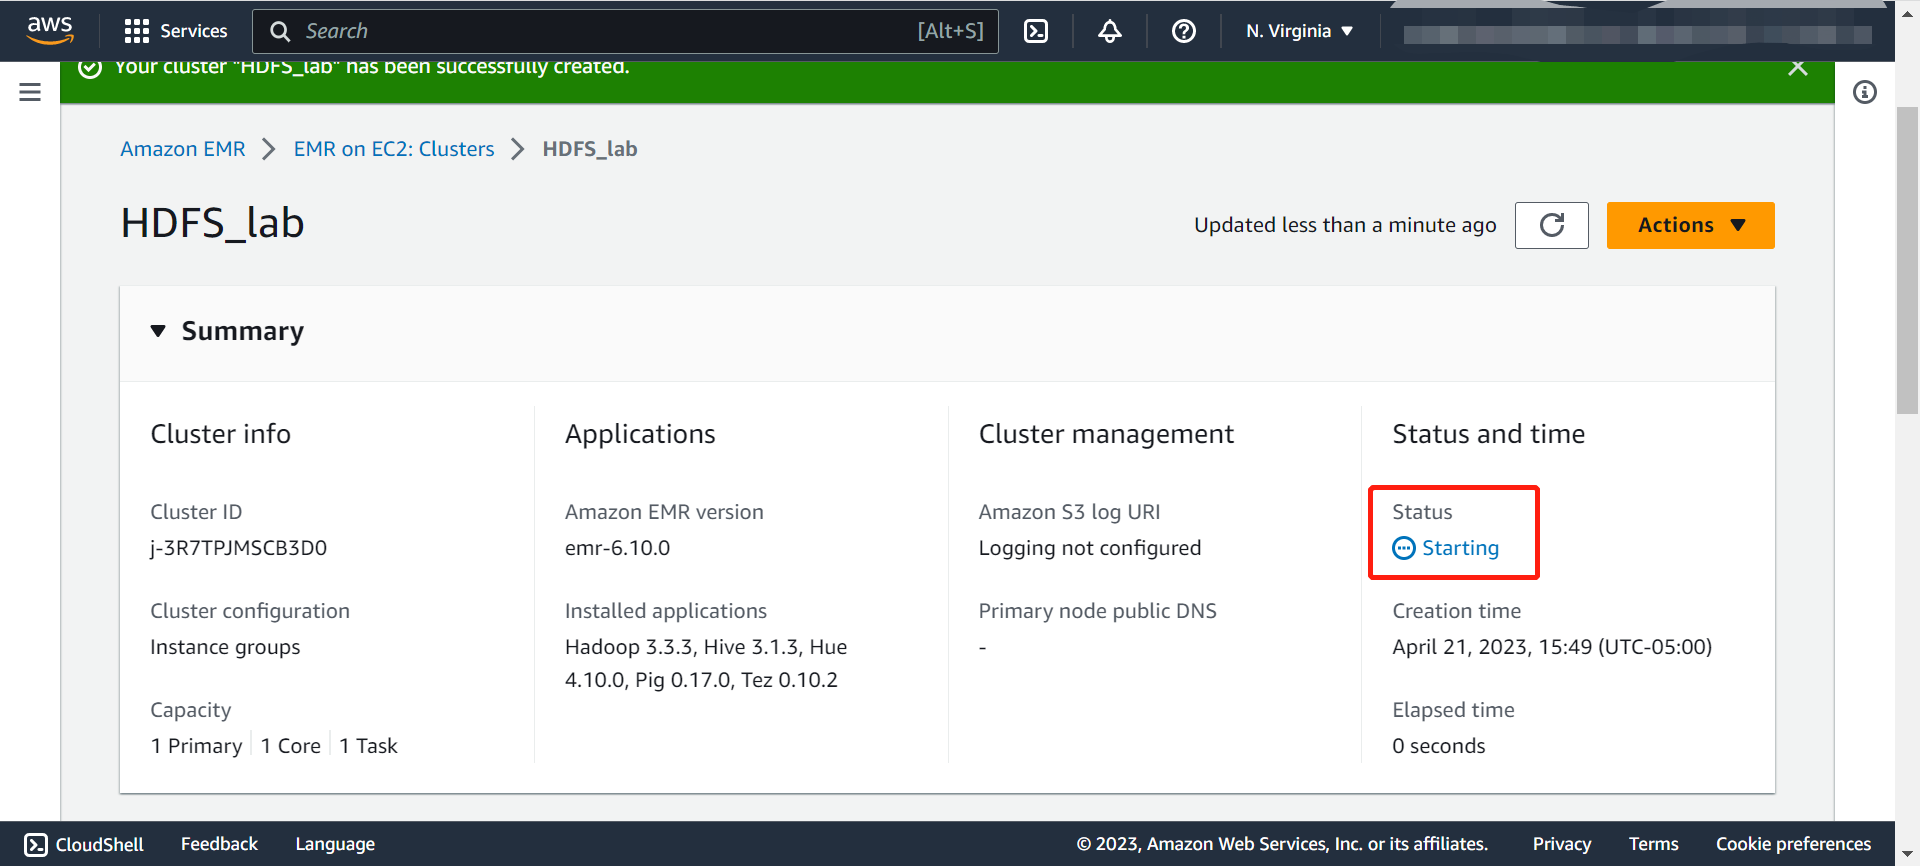

6. Edit inbound rules

[link text](https://)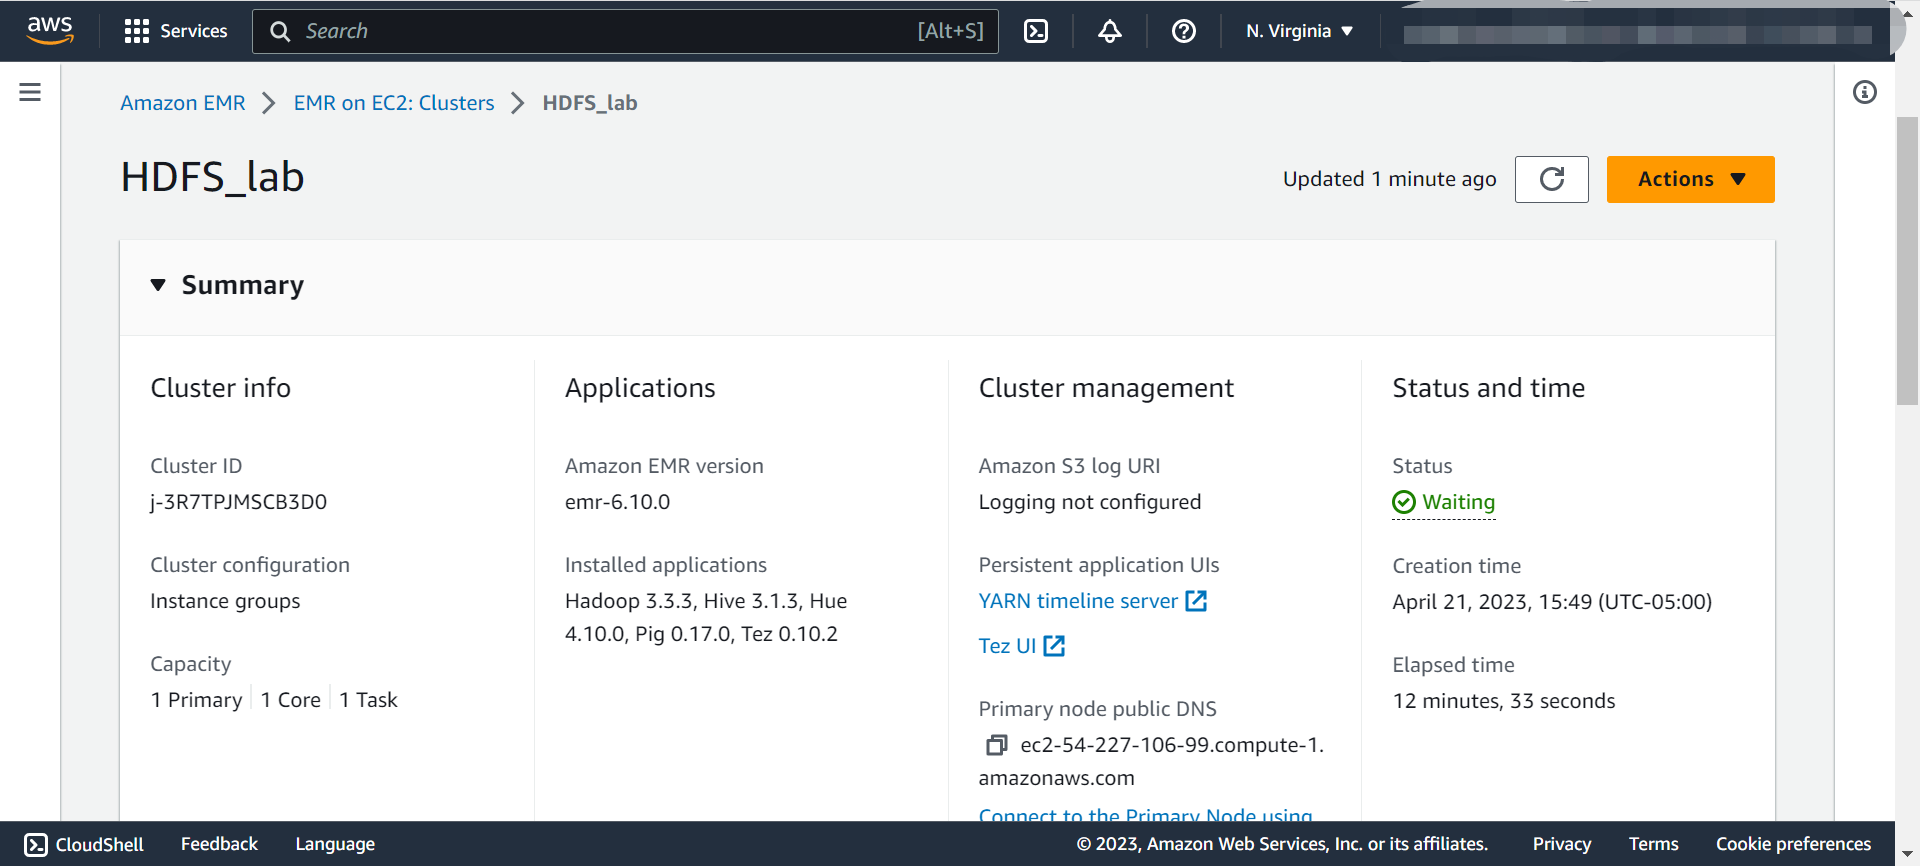

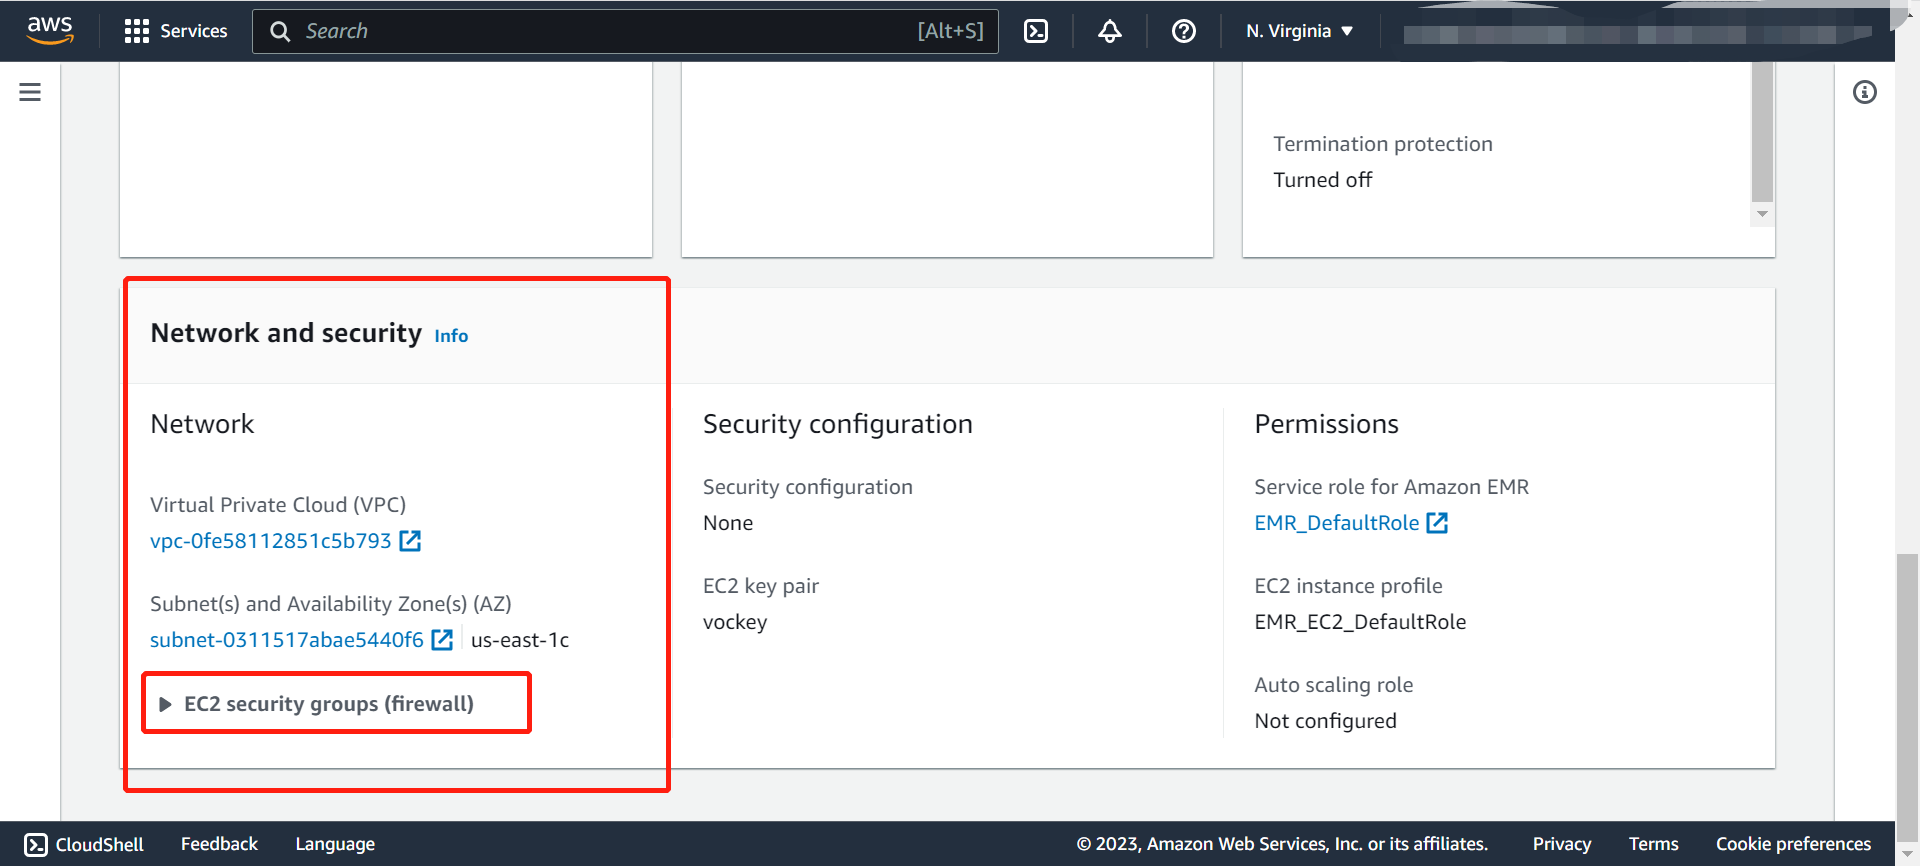

1682111010259.png

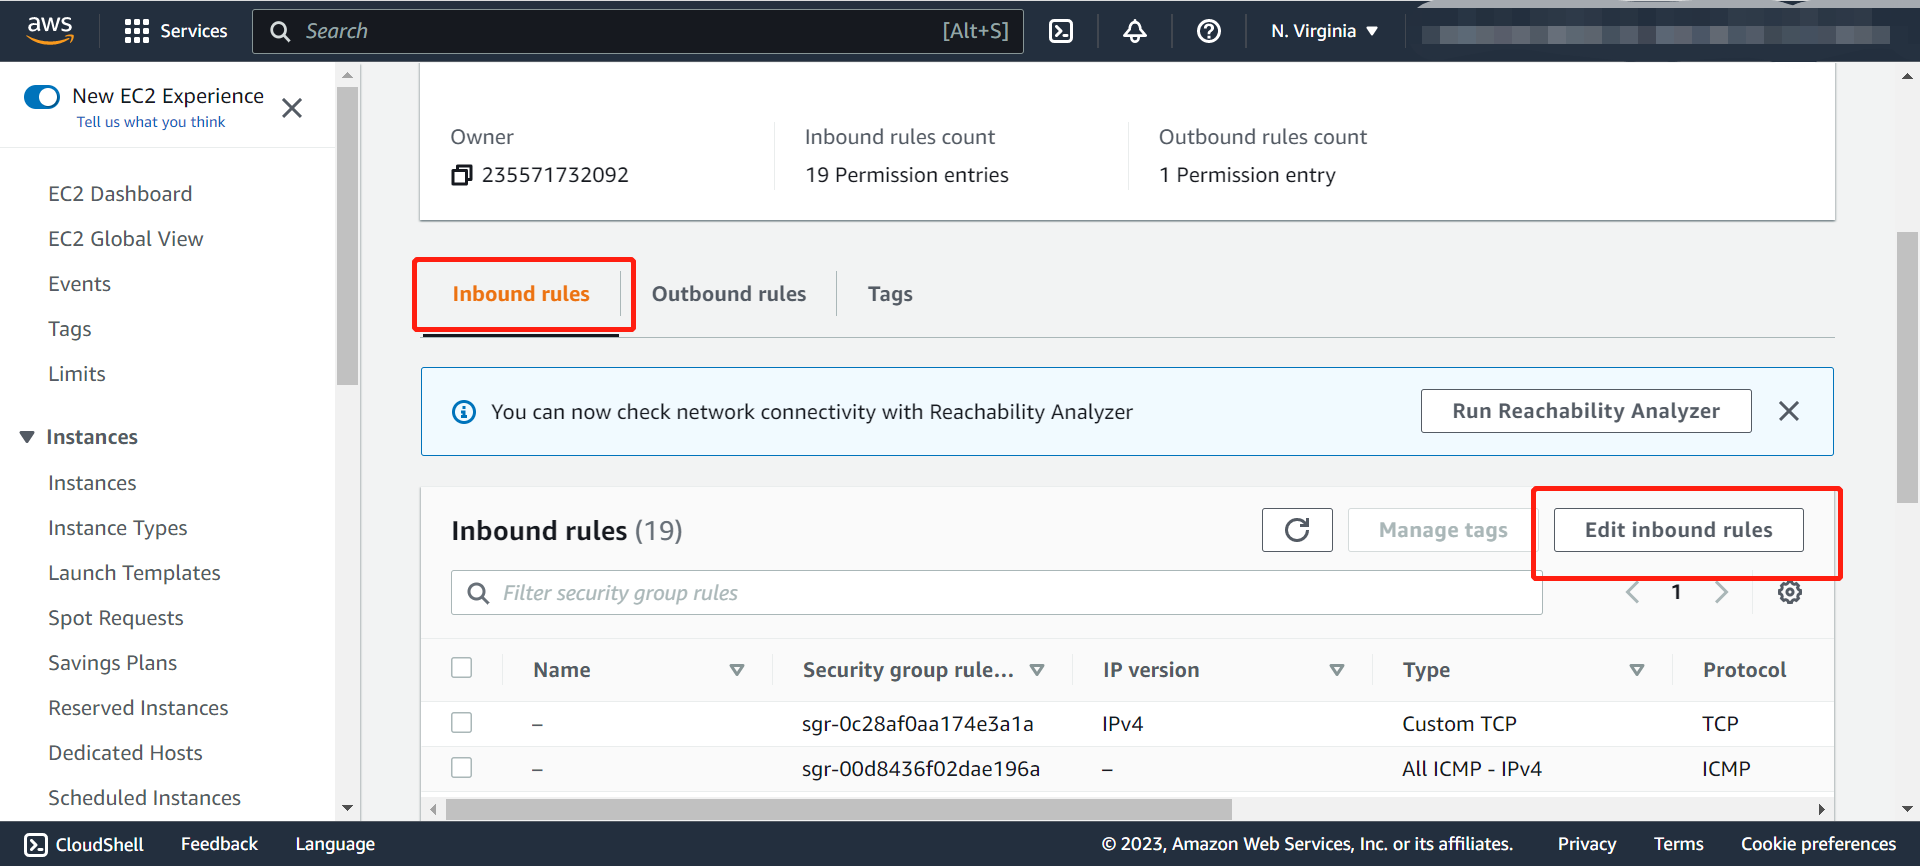

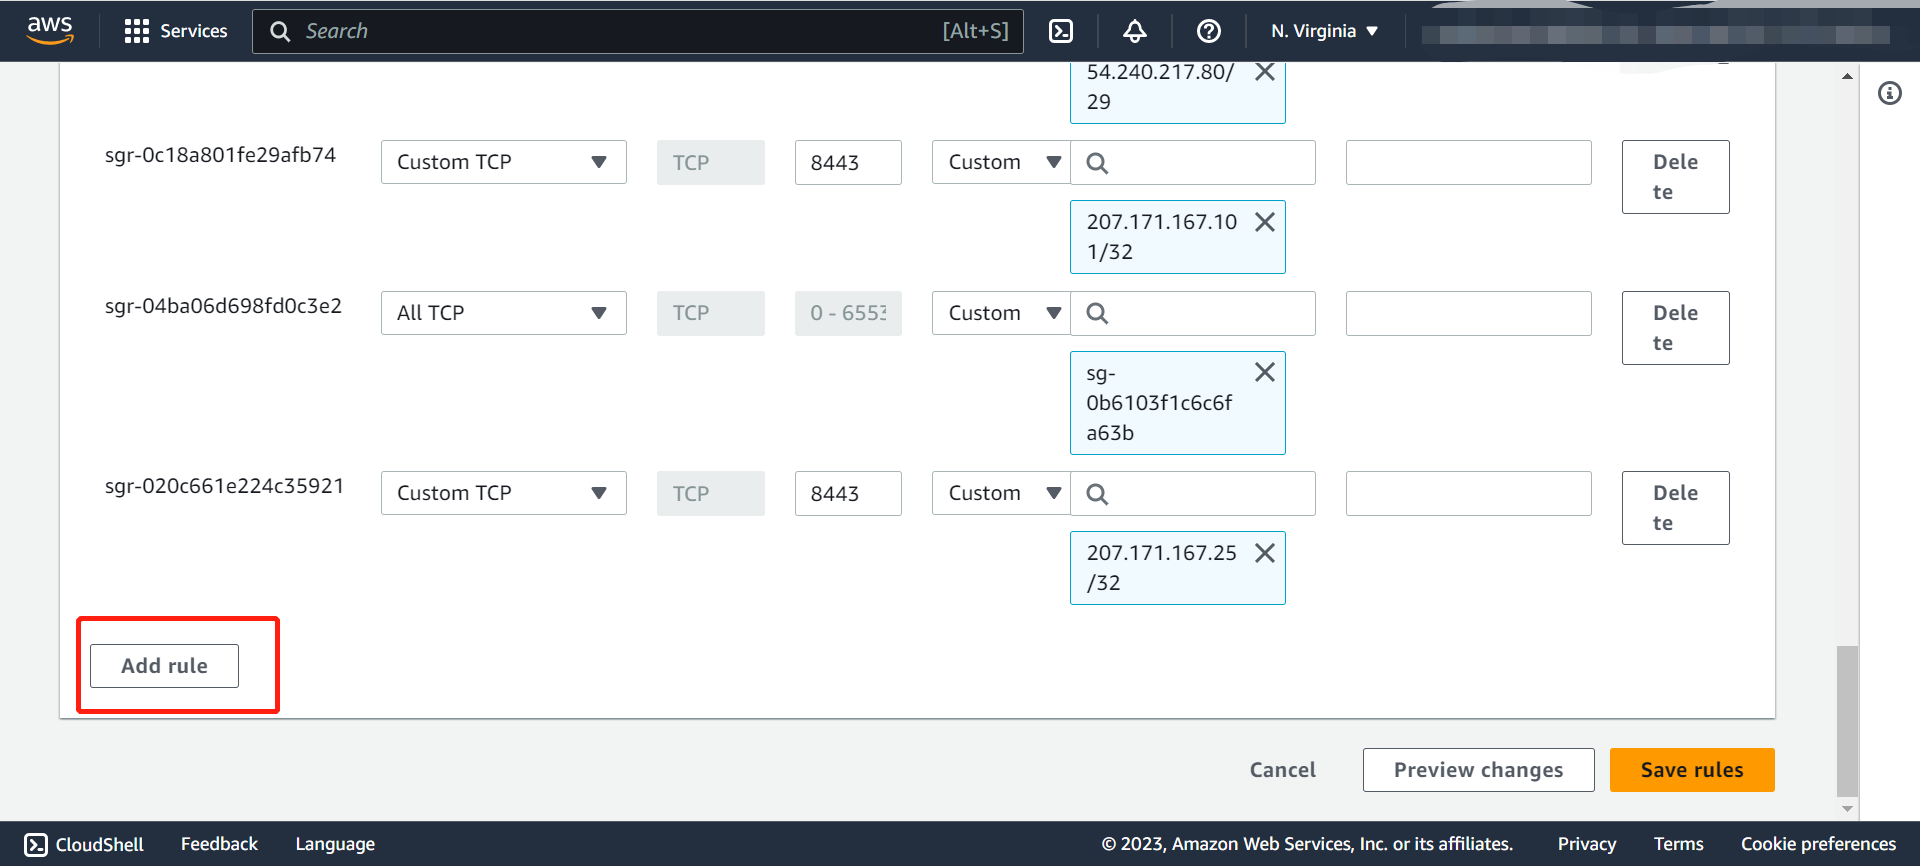

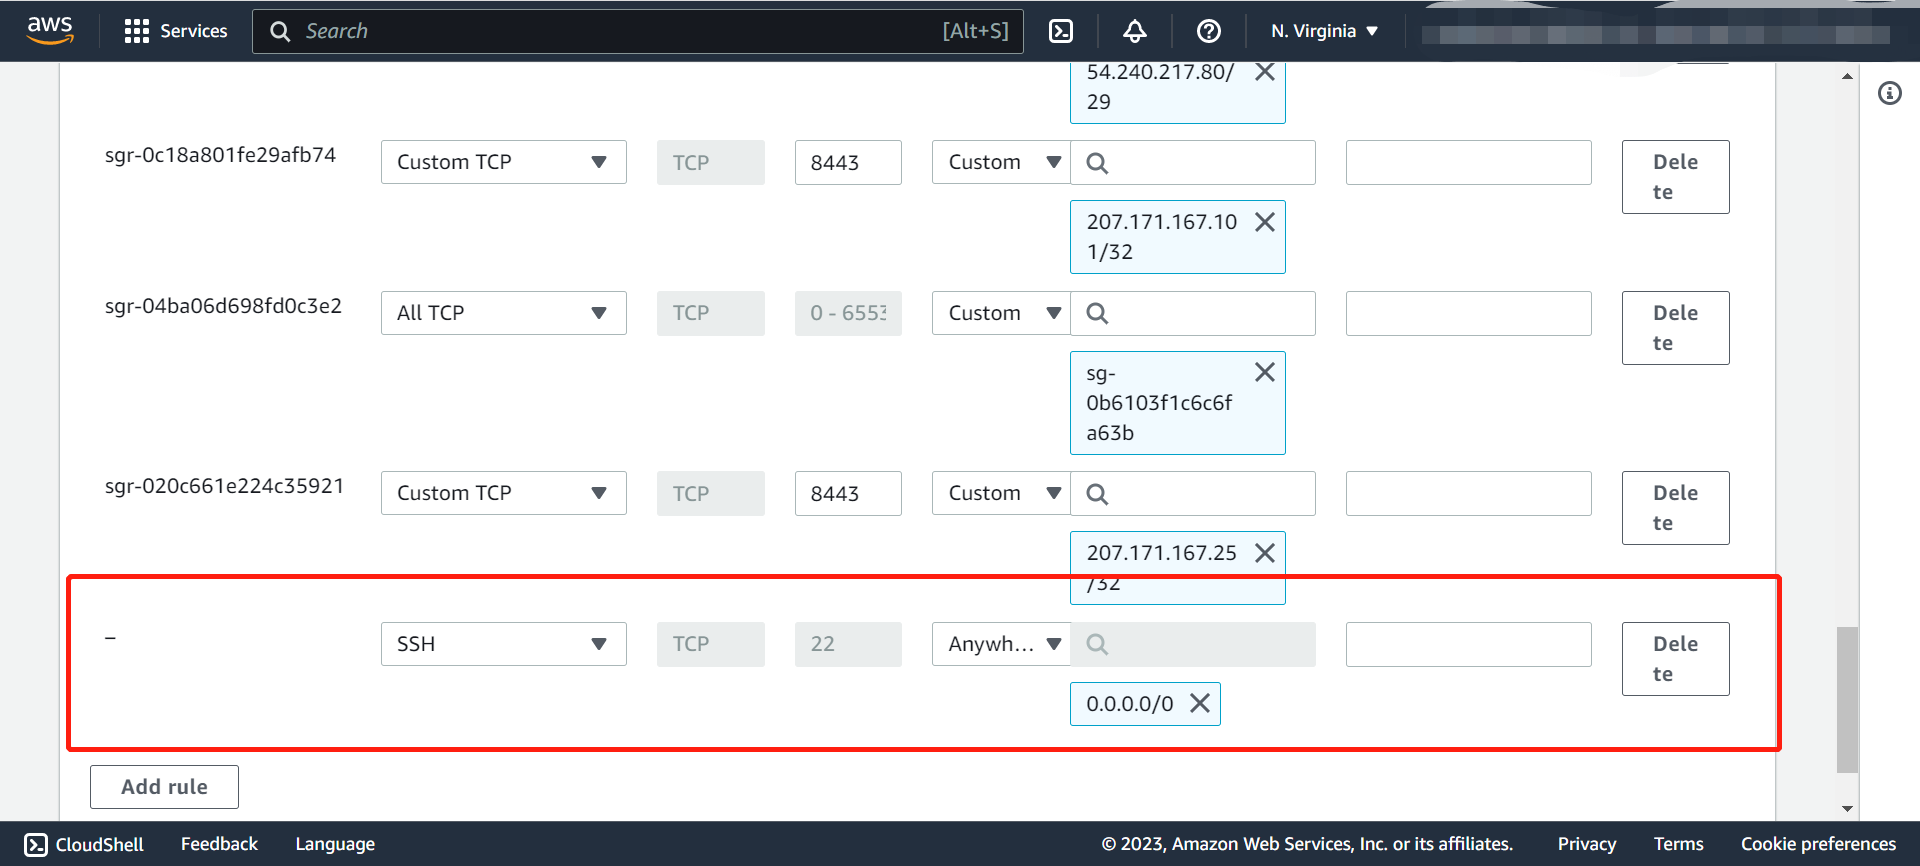

# Prepare to connect to primary node

We’re going to use two commands, in two separate terminals to connect to the primary node in your cluster.


Terminal 1 is used to connect to your primary node. You are basically “remoted” in to the server and commands you issue in this terminal are run on the primary node.

Terminal 2 is used to transfer files to and from the primary node. The copy program (scp) is run on your local machine (which may be a terminal or a Sagemaker Notebook instance).

If you are using

Mac: Open 2 terminal windows

Linux: Open 2 terminal windows

Windows using Sagemaker


## For windows user: SageMaker

1. Start a Sagemaker Notebook Instance from the AWS Console

    (a) Search for Sagemaker in the top menu bar

    (b) Click on Notebook in the left hand pane
    
    (c) Click on Notebook instances

1682110554200.png

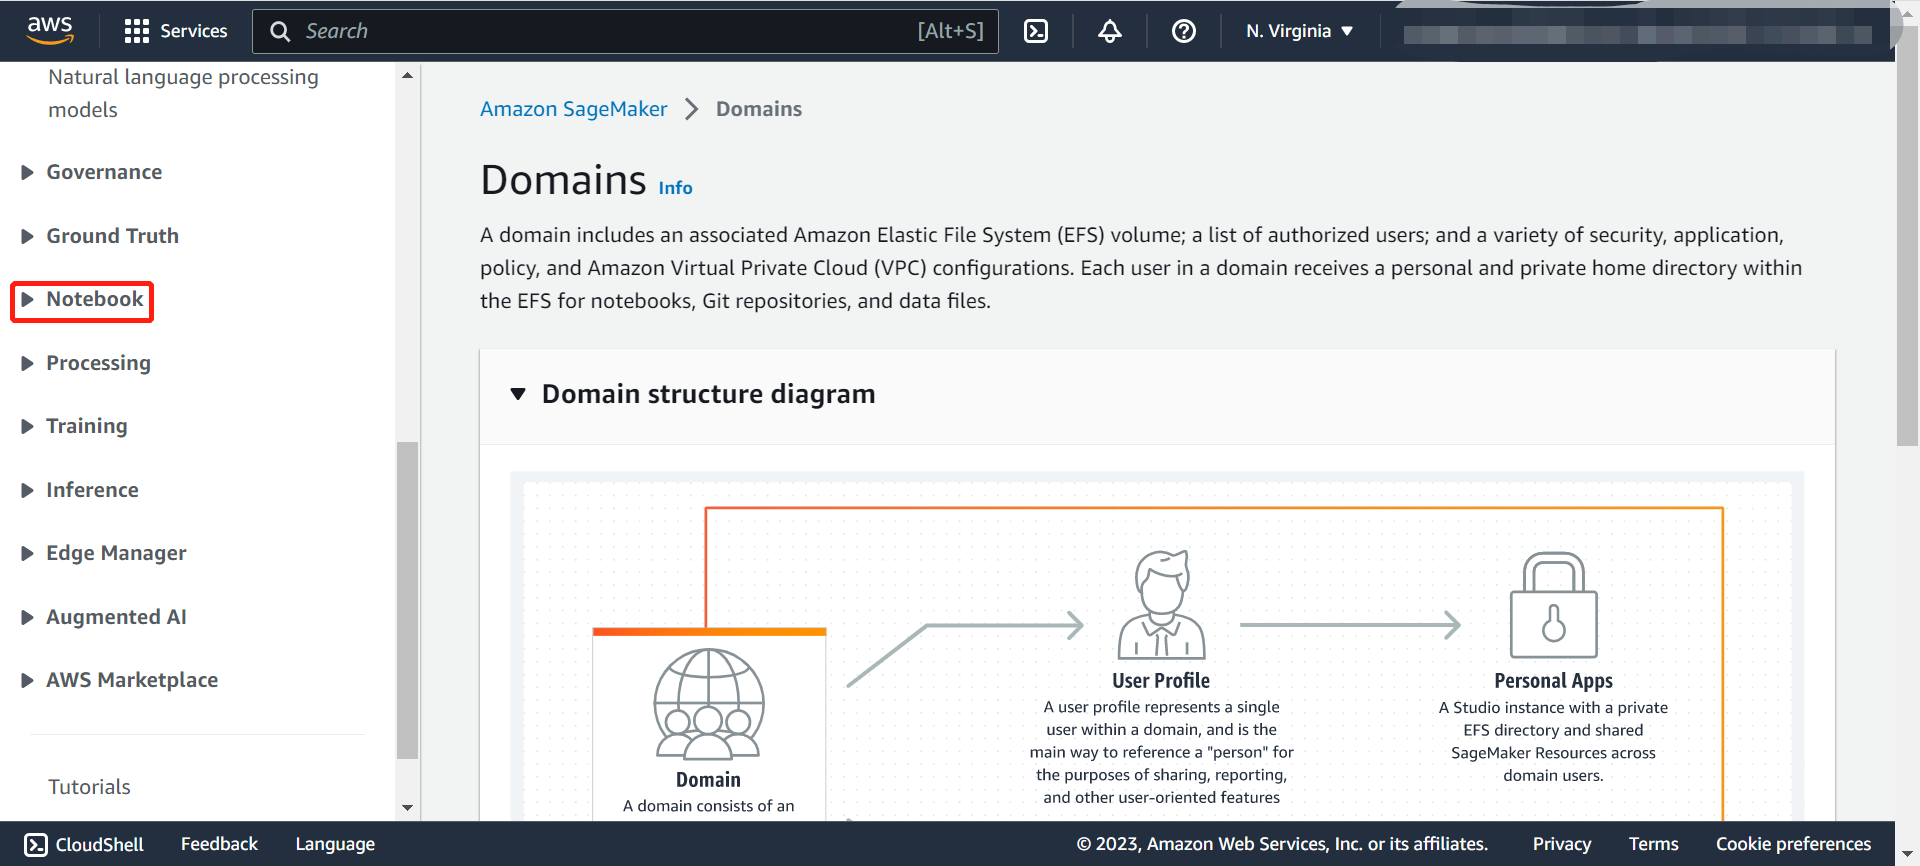

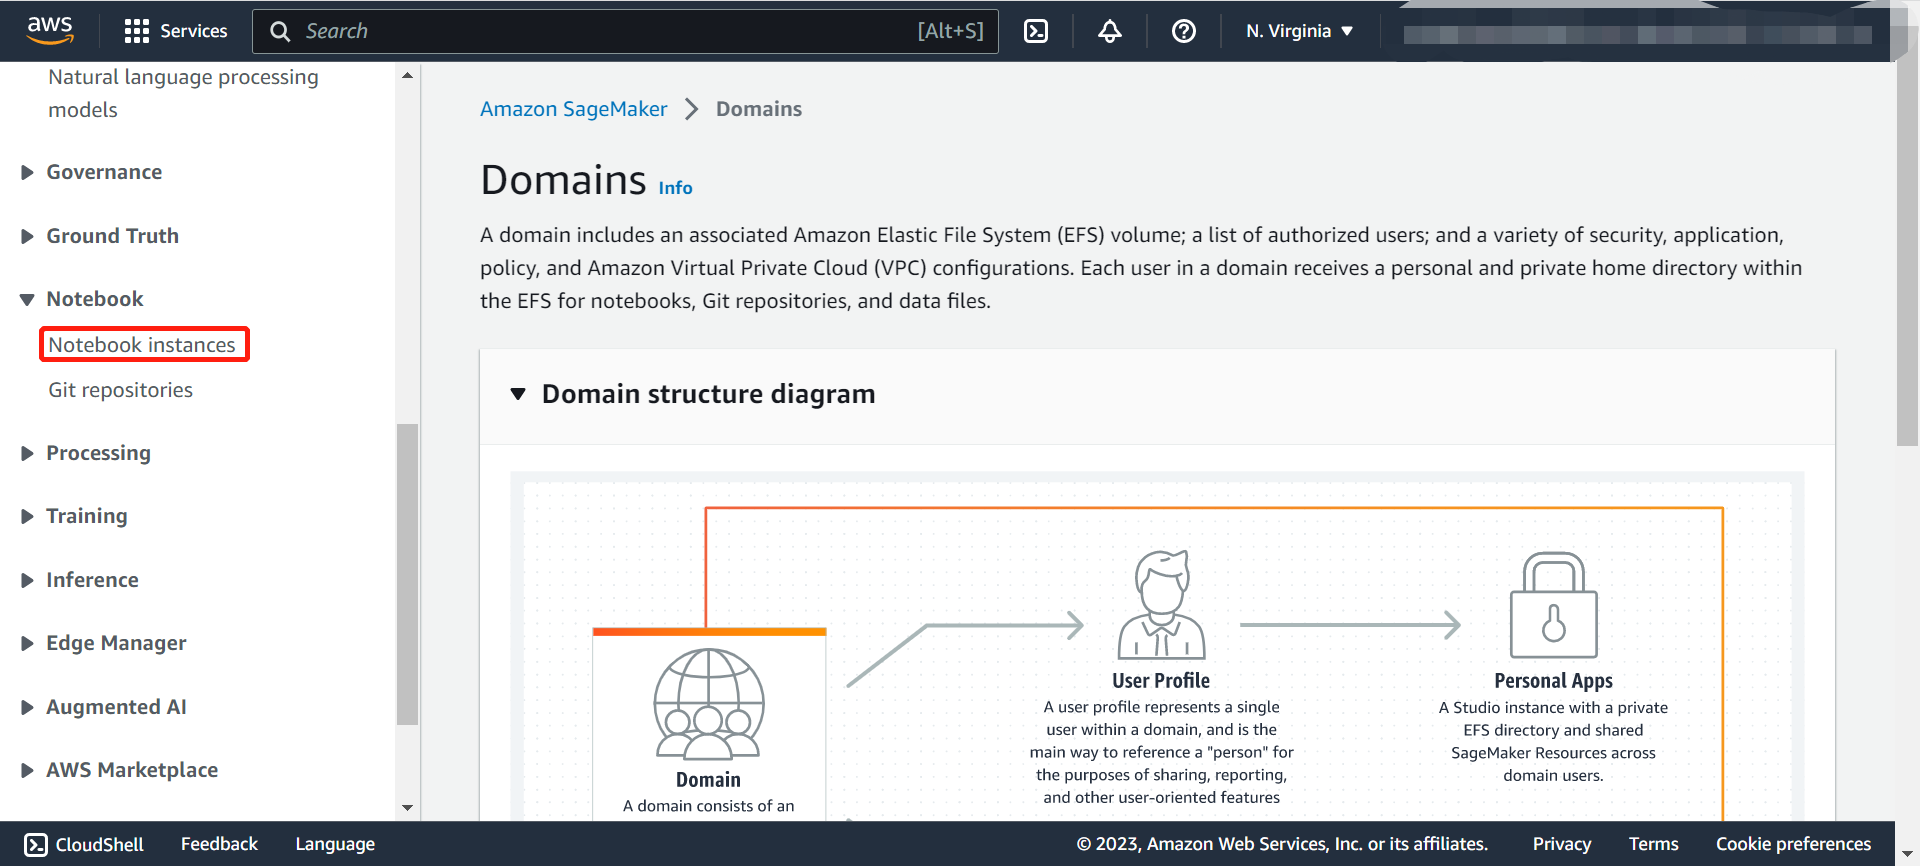

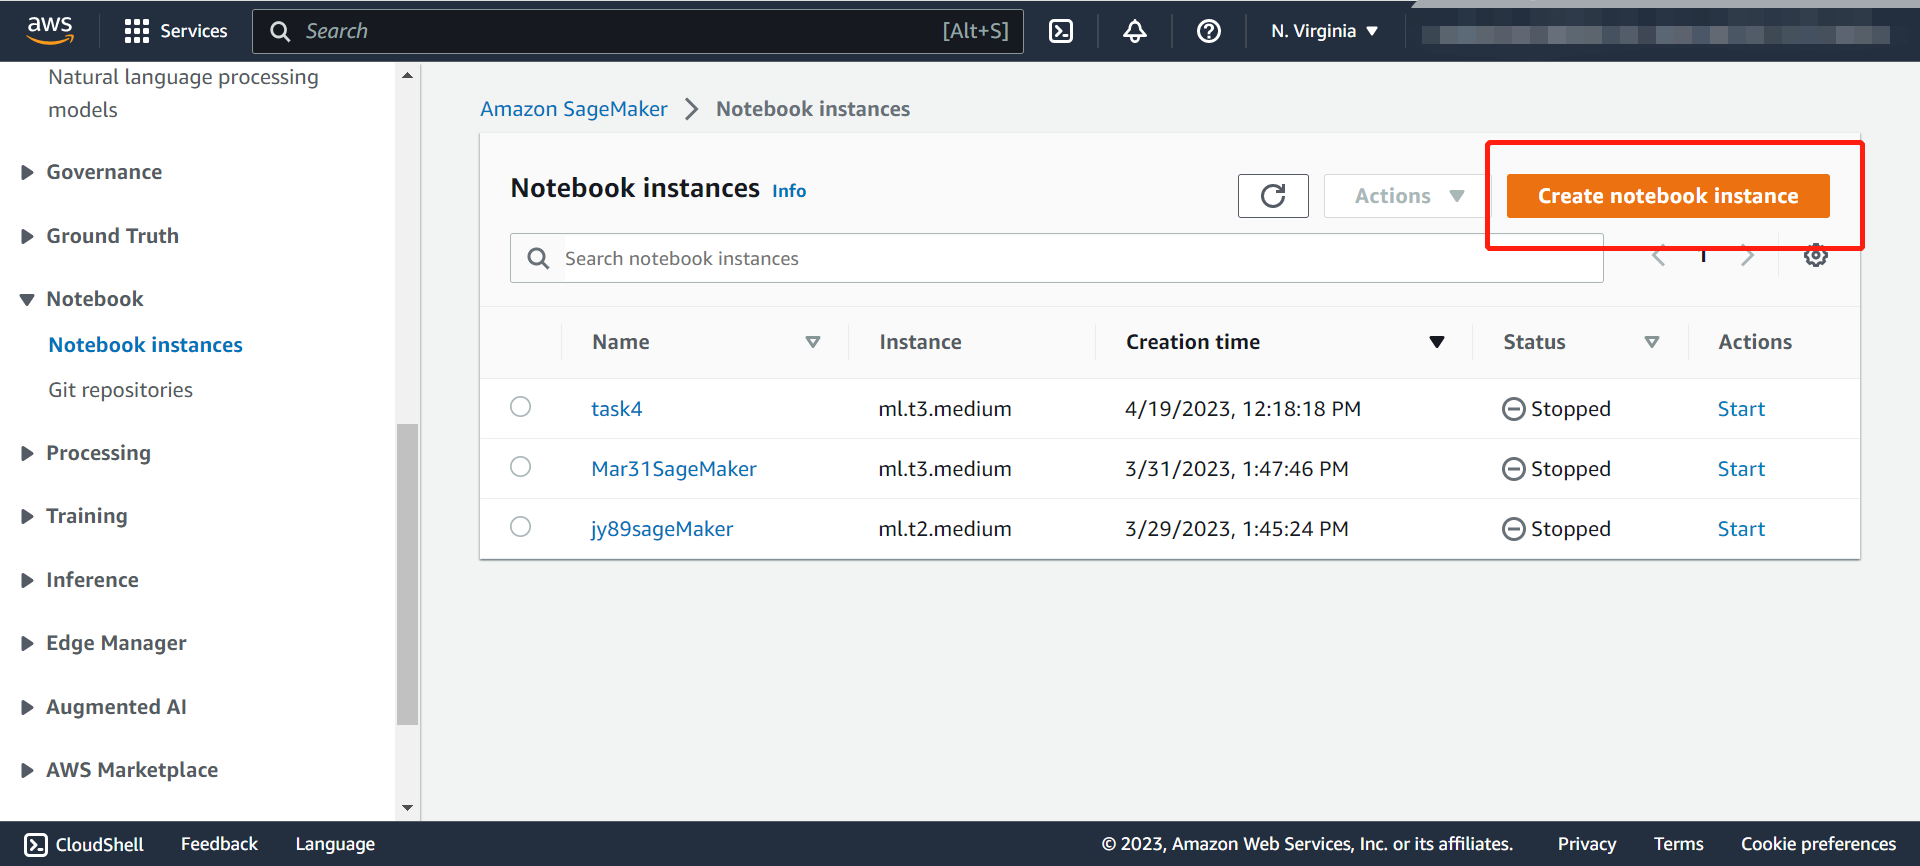

1682110665442.png

1682110681425.png

1682110709572.png

If you already have one Notebook instance here, just click Start to use it. All documents you uploaded to this will still be there.

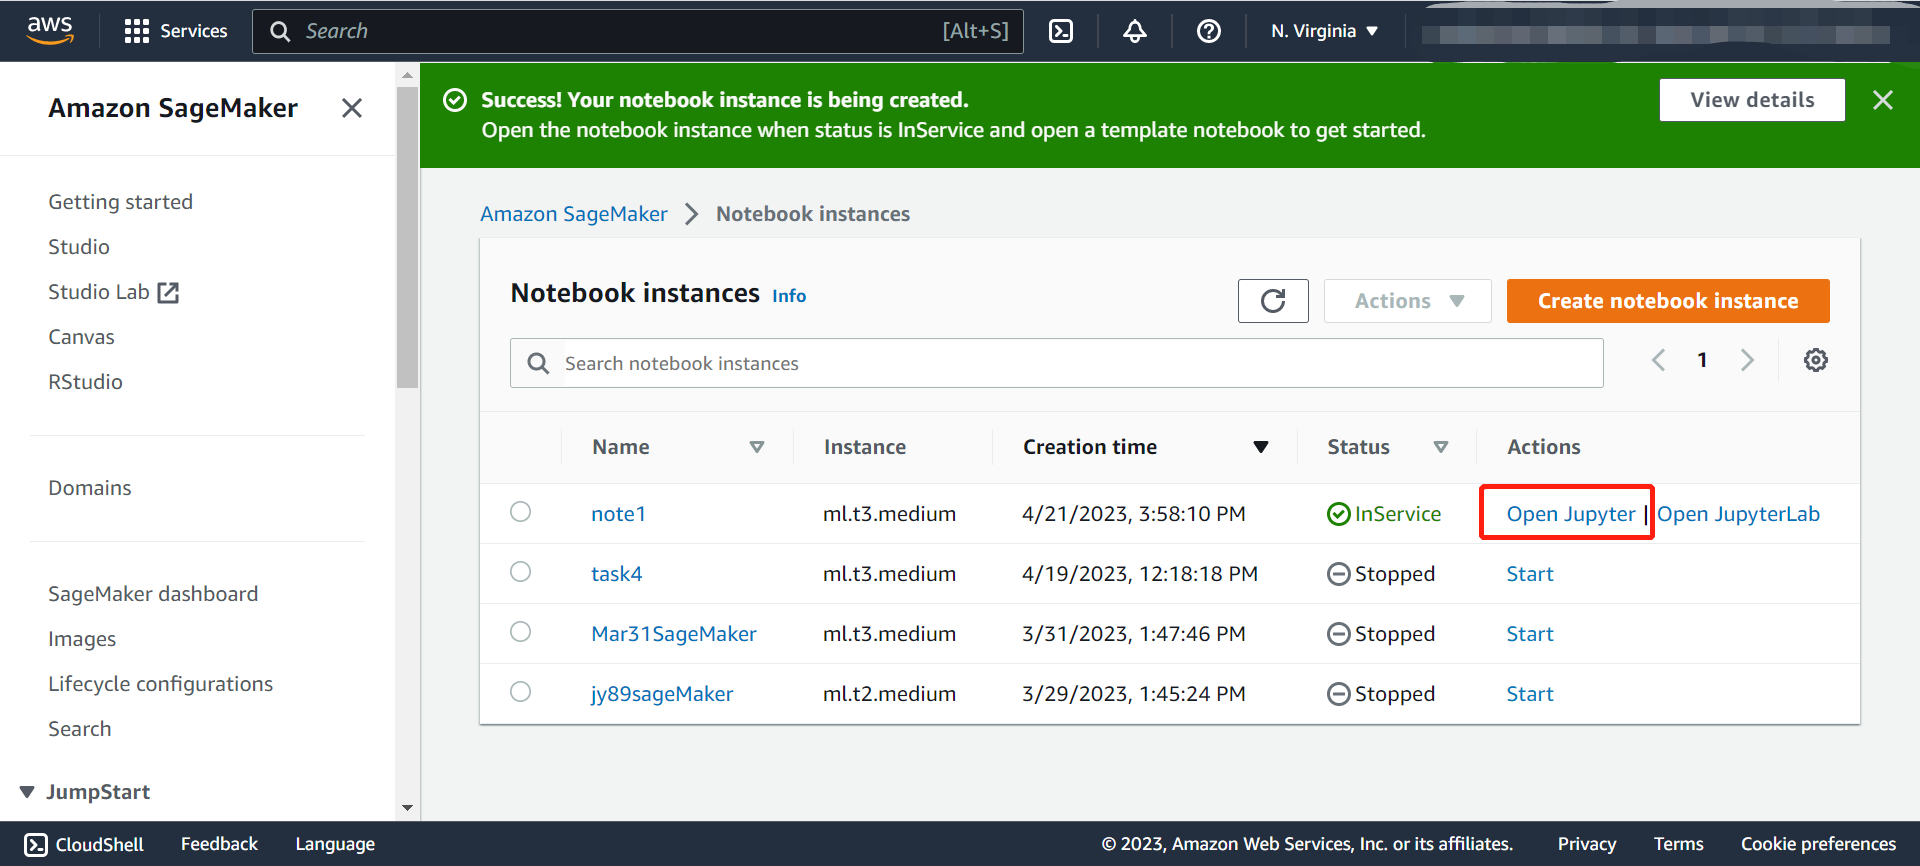

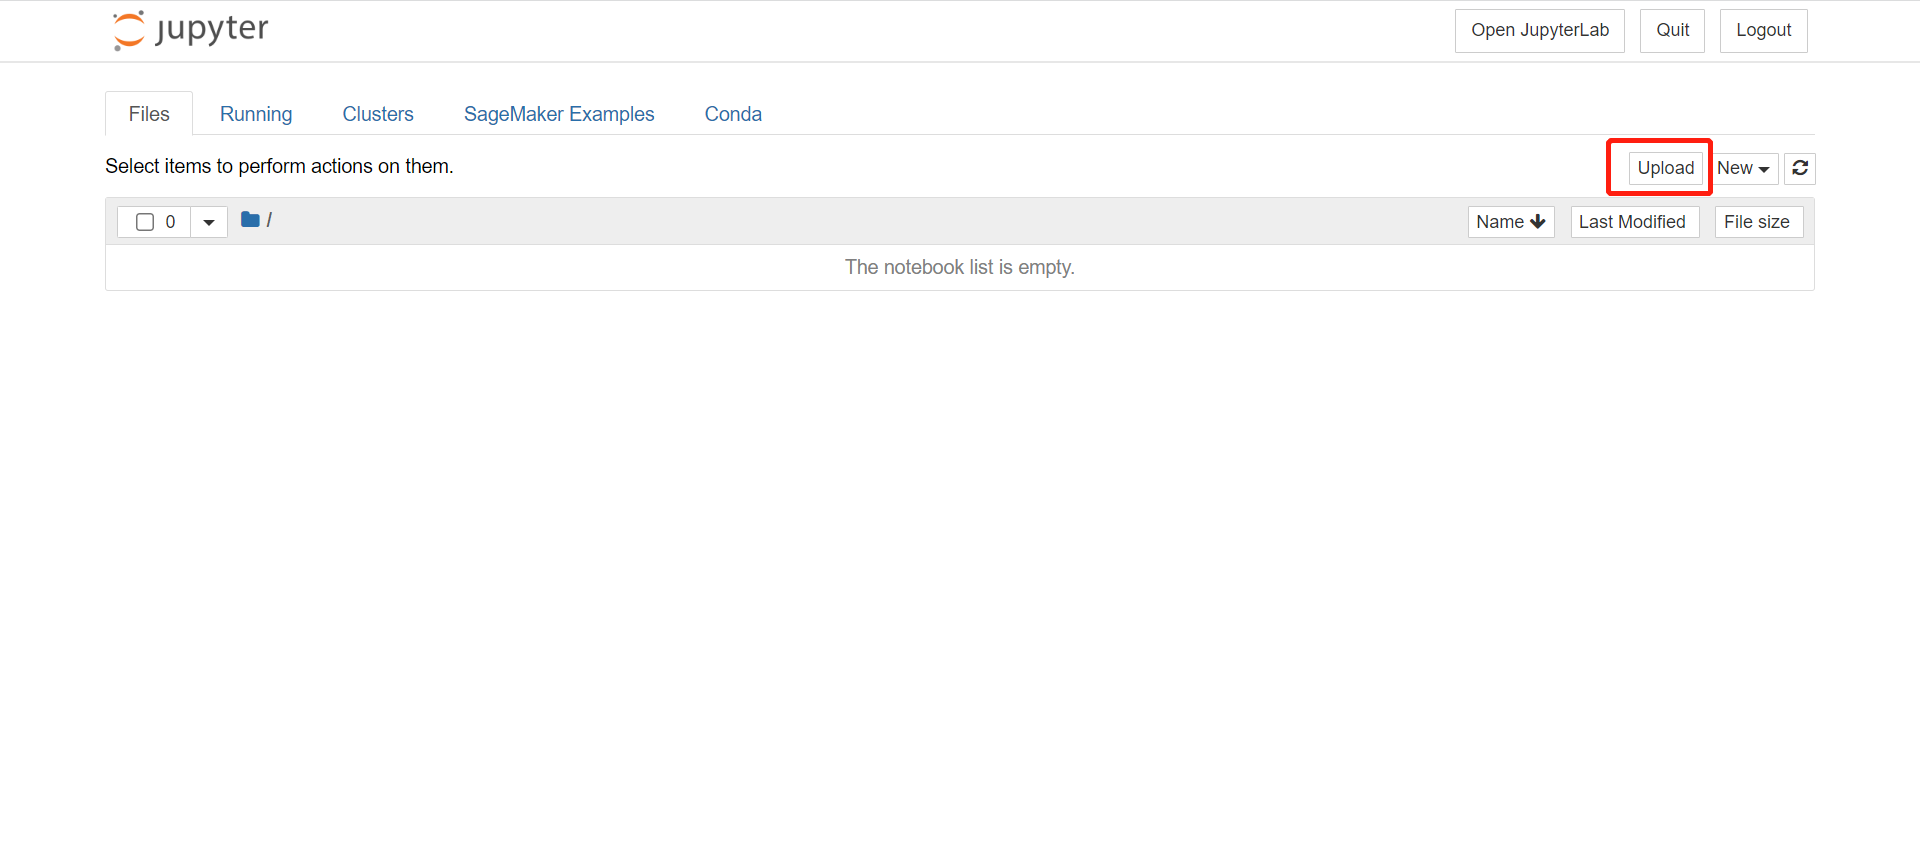

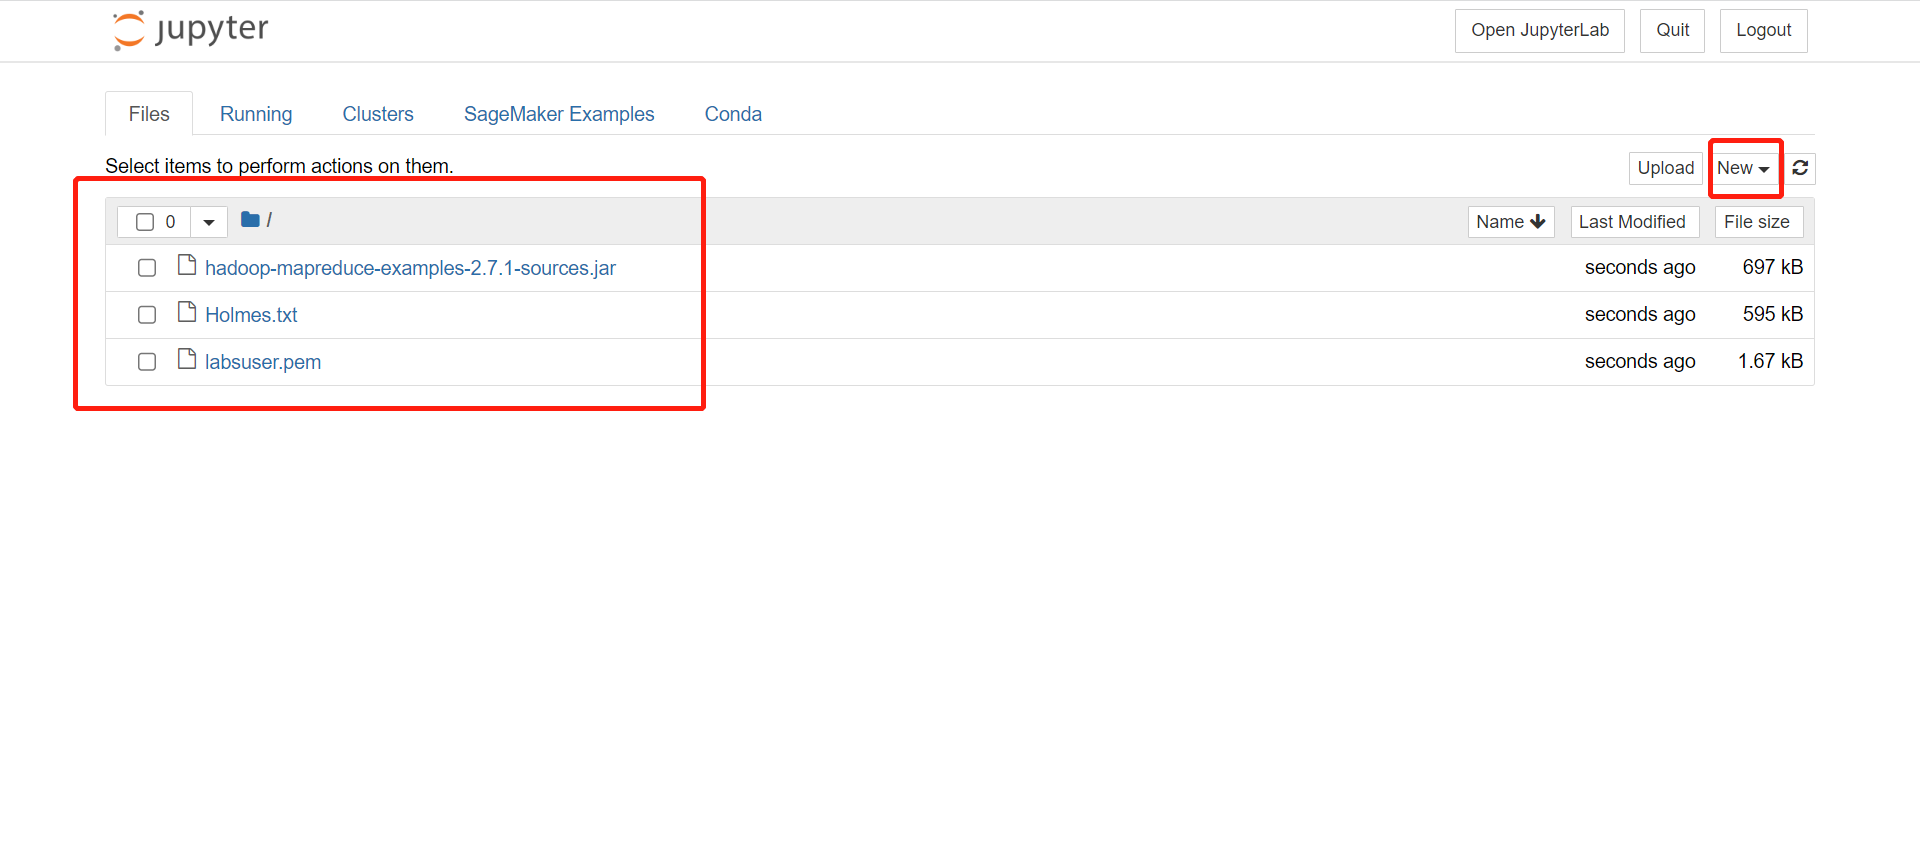

## Identifying Primary Node’s Domain

Click on the link labeled “Connect to the Master Node Using SSH”. This pops up a window with the Host Name and provides an ssh command for Mac / Linux. Copy this text. 
You will need to change

∼/vockey.pem to labsuser.pem

For example:

From

ssh -i ~/vockey.pem hadoop@ec2-54-227-106-99.compute-1.amazonaws.com

to

ssh -i labsuser.pem hadoop@ec2-54-227-106-99.compute-1.amazonaws.com

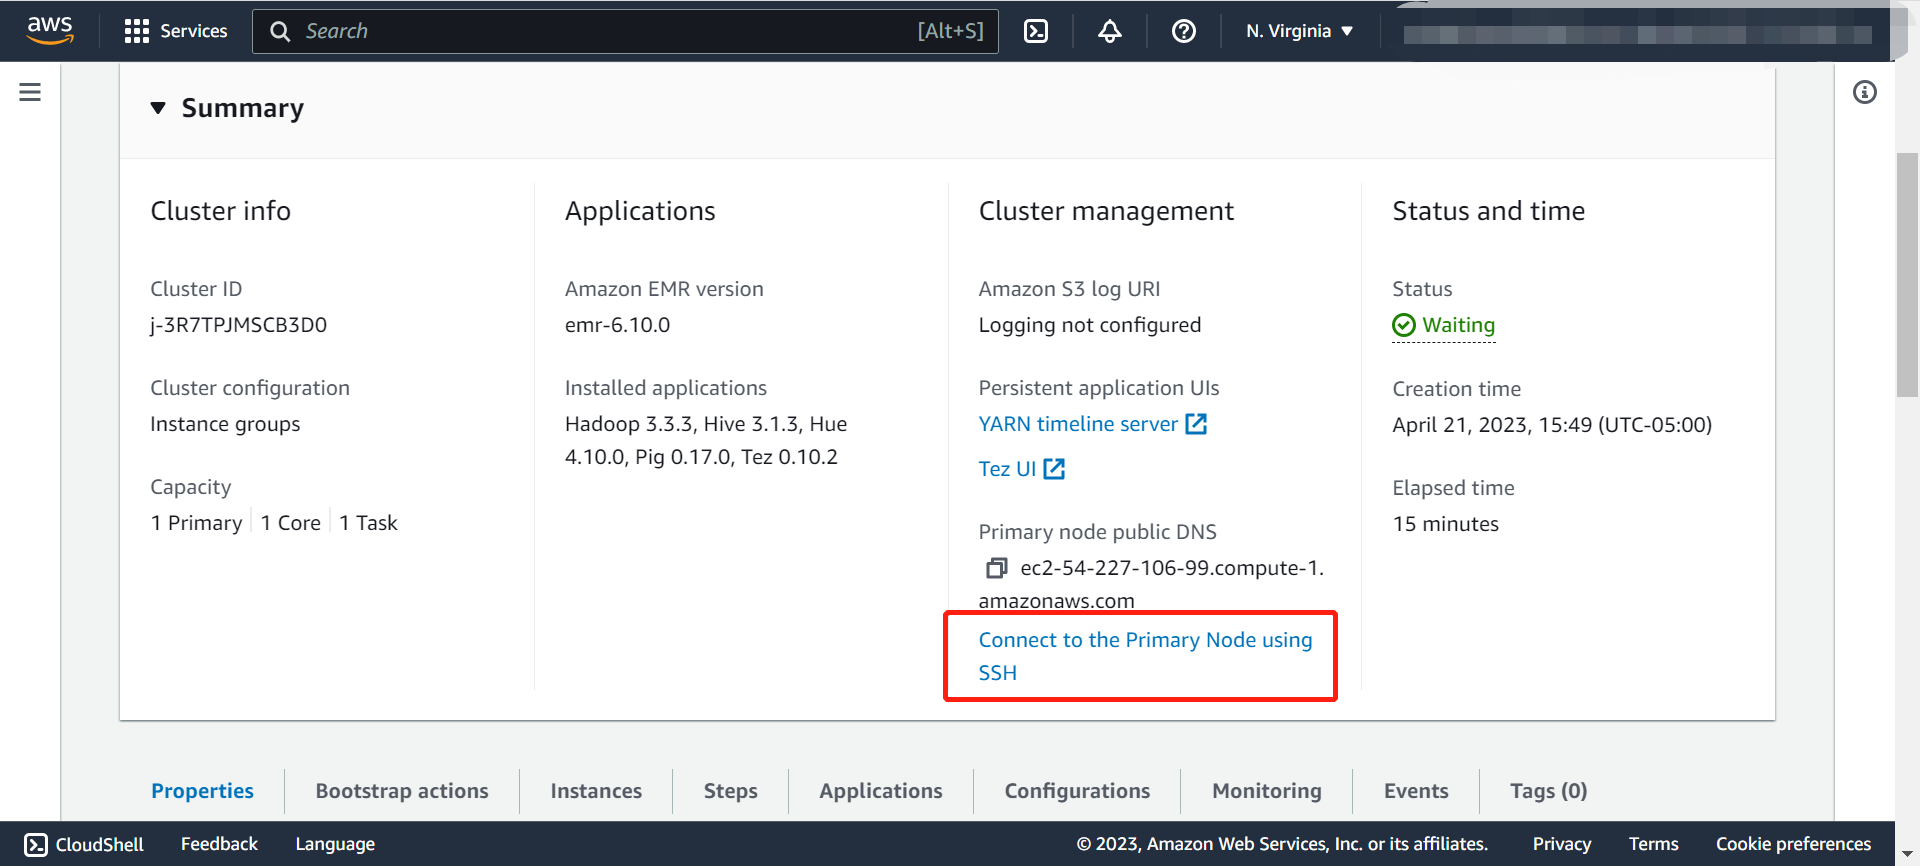

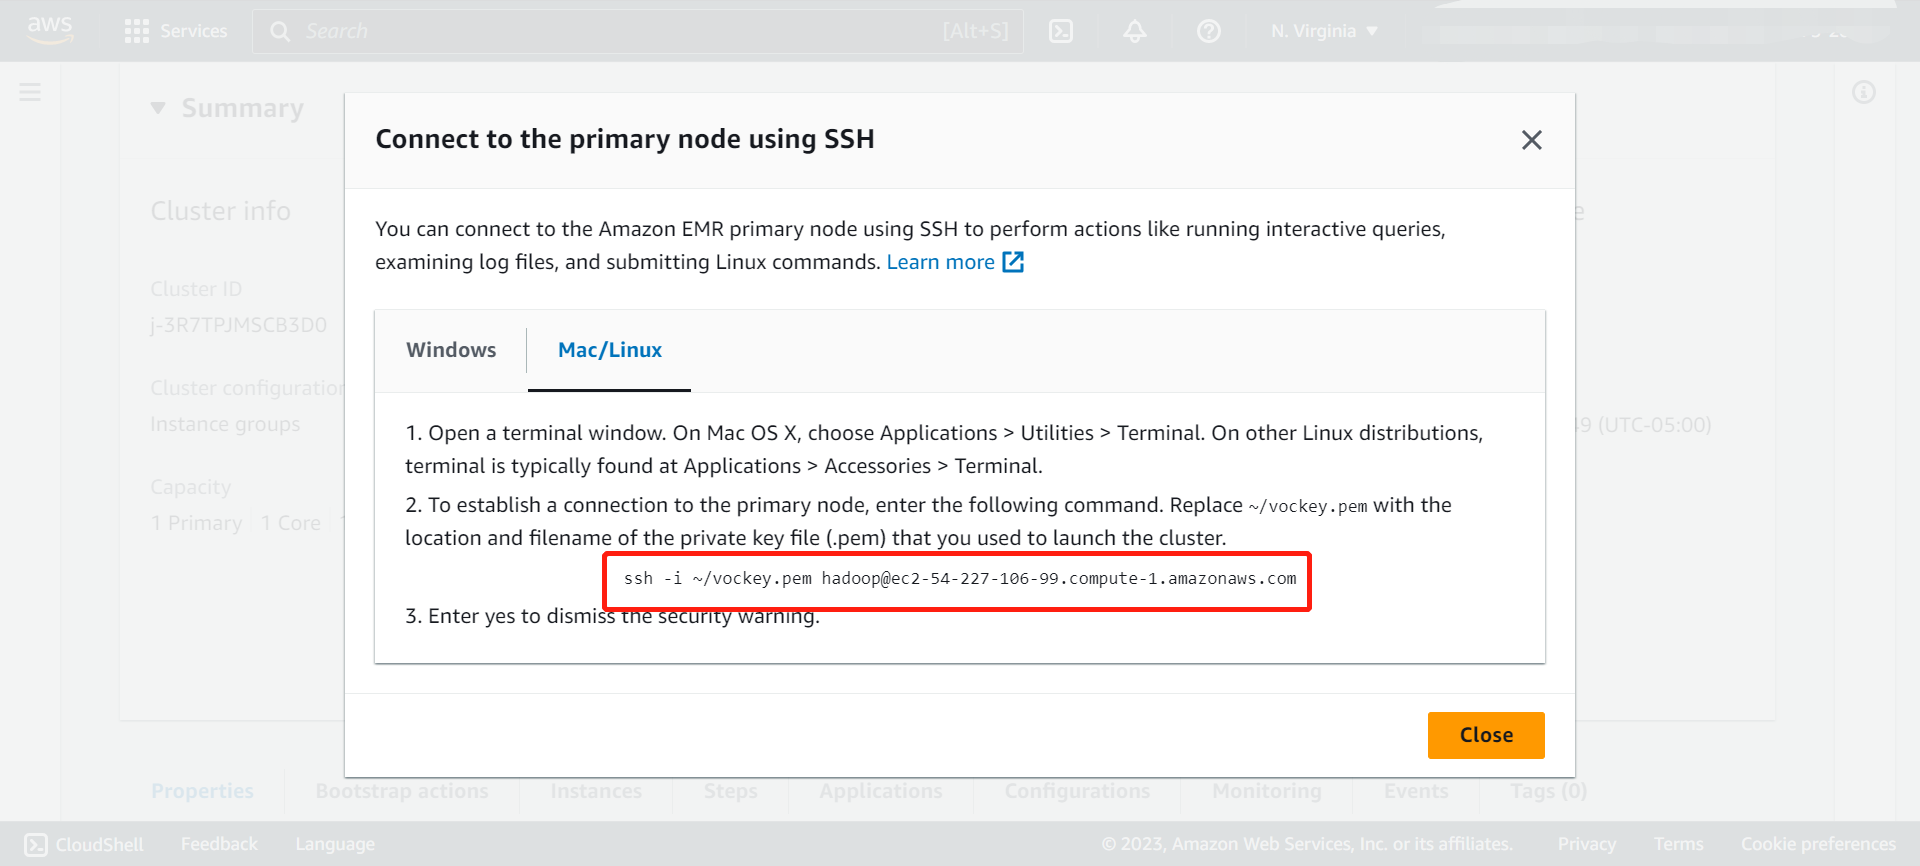

## Connecting from your terminal


### Terminal 1

if using Sage Maker

In [ ]:
cd SageMaker

change the permission on the file so only you can read and write it

In [ ]:
chmod 600 labsuser.pem

connect to primary node

answer yes during login

In [ ]:
ssh -i labsuser.pem hadoop@<yourDNShere>.compute-1.amazonaws.com
# for example ssh -i labsuser.pem hadoop@ec2-54-227-106-99.compute-1.amazonaws.com

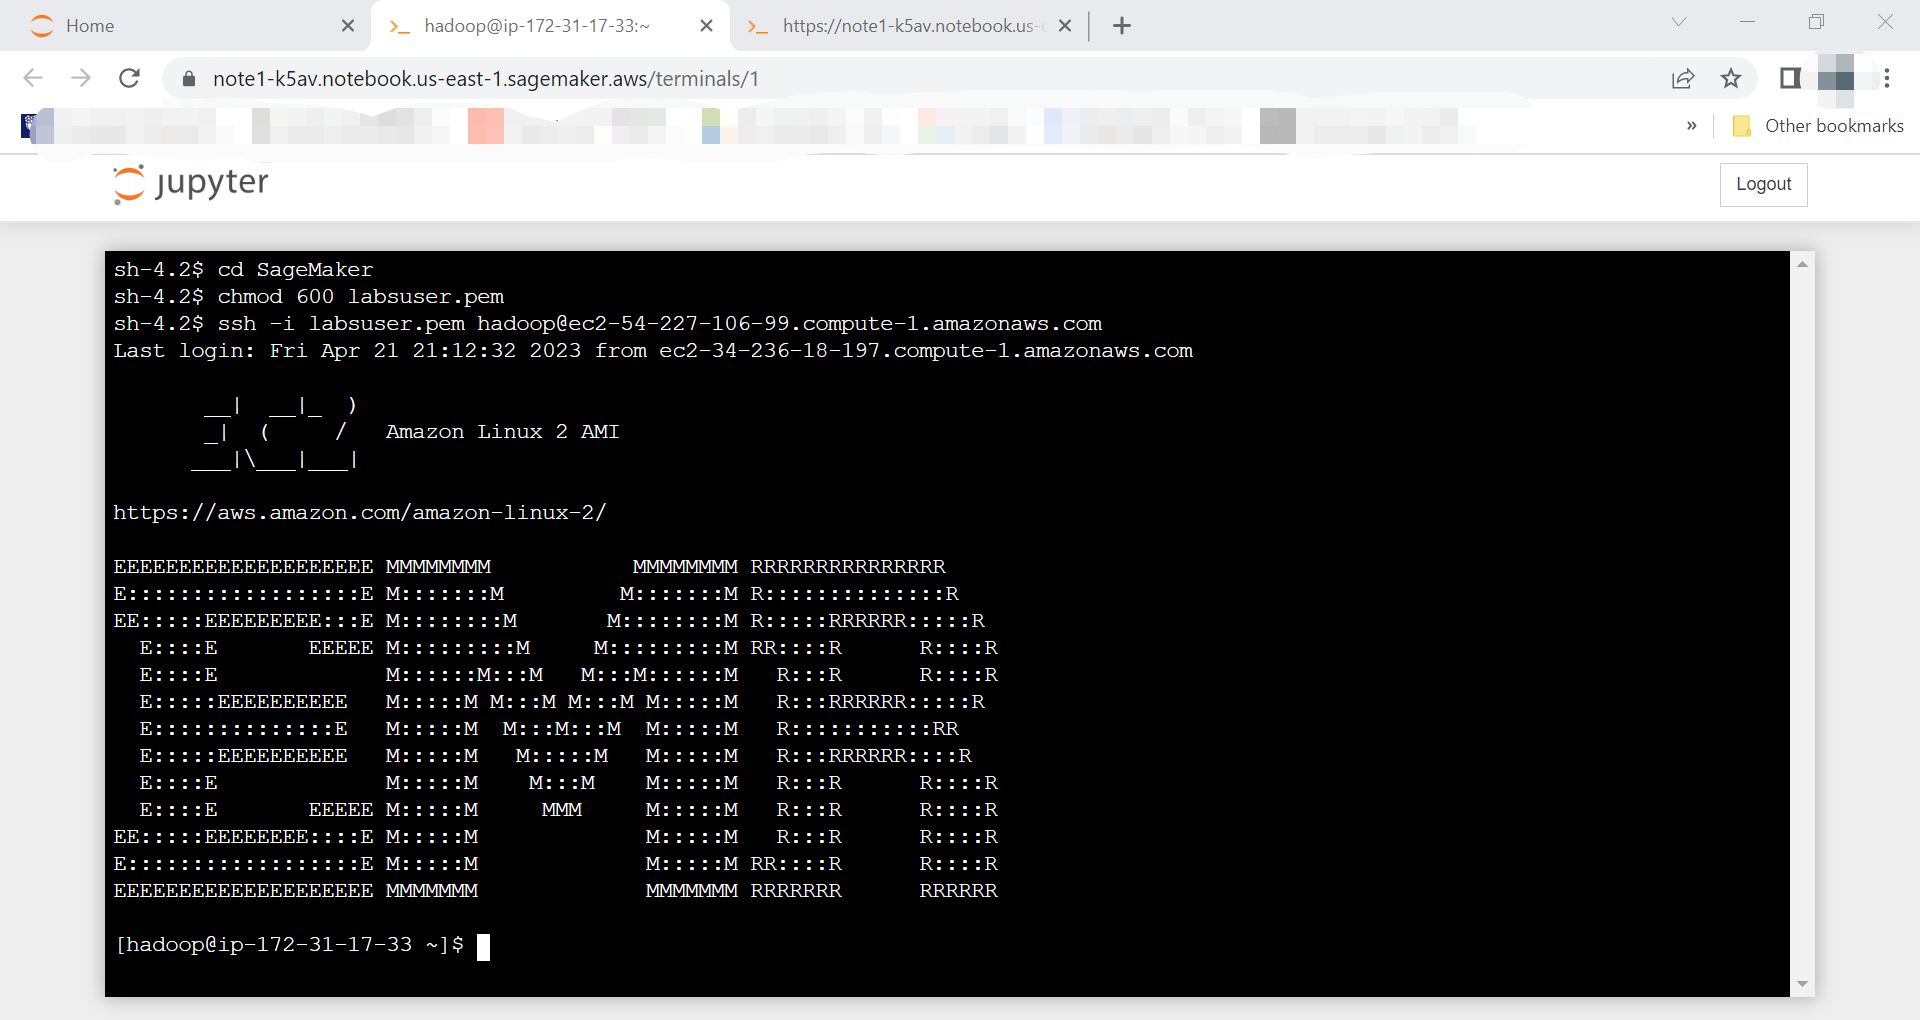

# HDFS

CREATE & UPLOAD file to primary node

## terminal 2

Copy the files Holmes.txt and hadoop-mapreduce-examples-2.7.1-sources.jar
from your local location (your computer, or Sagemaker) to the primary node, in the home directory. NOTE the “:” after the machine name. This tells scp that the name is a machine destination, not a file name on your “local” machine.

In [ ]:
scp -i labsuser.pem Holmes.txt hadoop@<yourDNShere>.compute-1.amazonaws.com:

In [ ]:
scp -i labsuser.pem hadoop-mapreduce-examples-2.7.1-sources.jar hadoop@<yourDNShere>.compute-1.amazonaws.com:

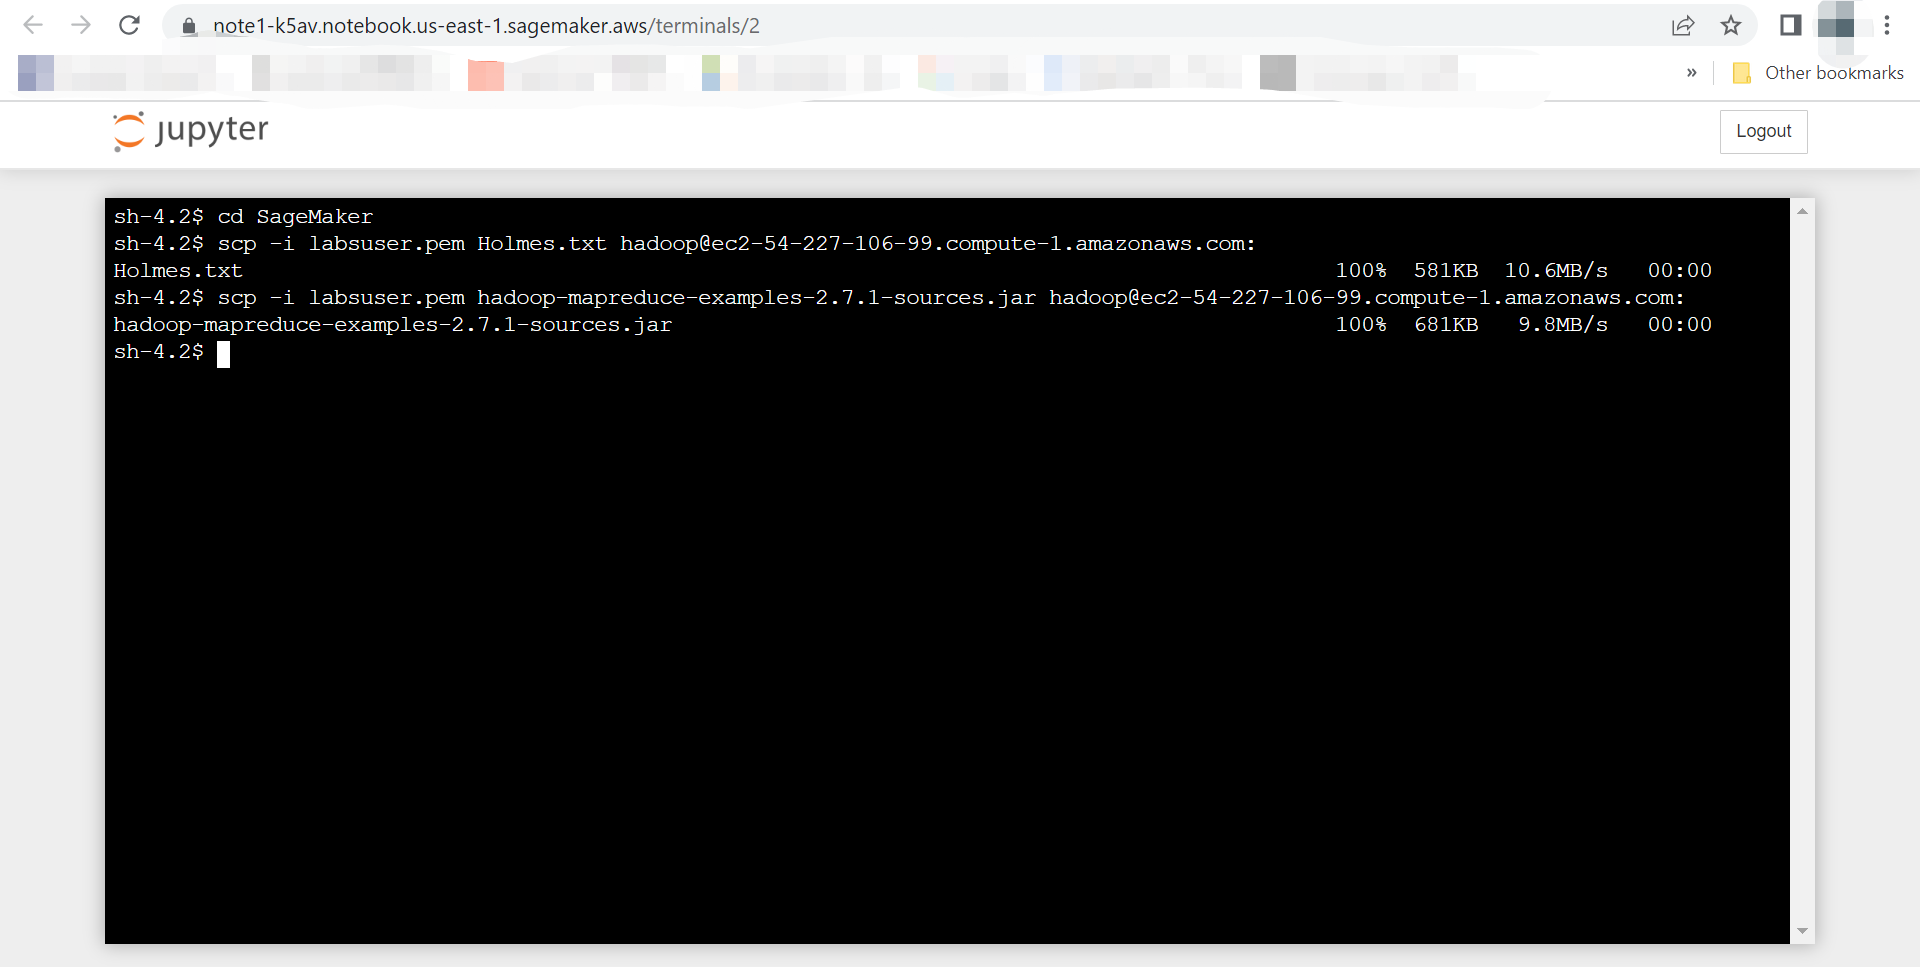

## terminal 1

(a)  Create a directory named input in the HDFS

In [ ]:
hdfs dfs -mkdir input

(b) Copy the Holmes.txt file from the primary node to HDFS

In [ ]:
hdfs dfs -put Holmes.txt input

Your can visualize the file locations as shown in Figure 11, for the uploads and input directories.

(c) List the items in the directory

In [ ]:
hdfs dfs -ls input

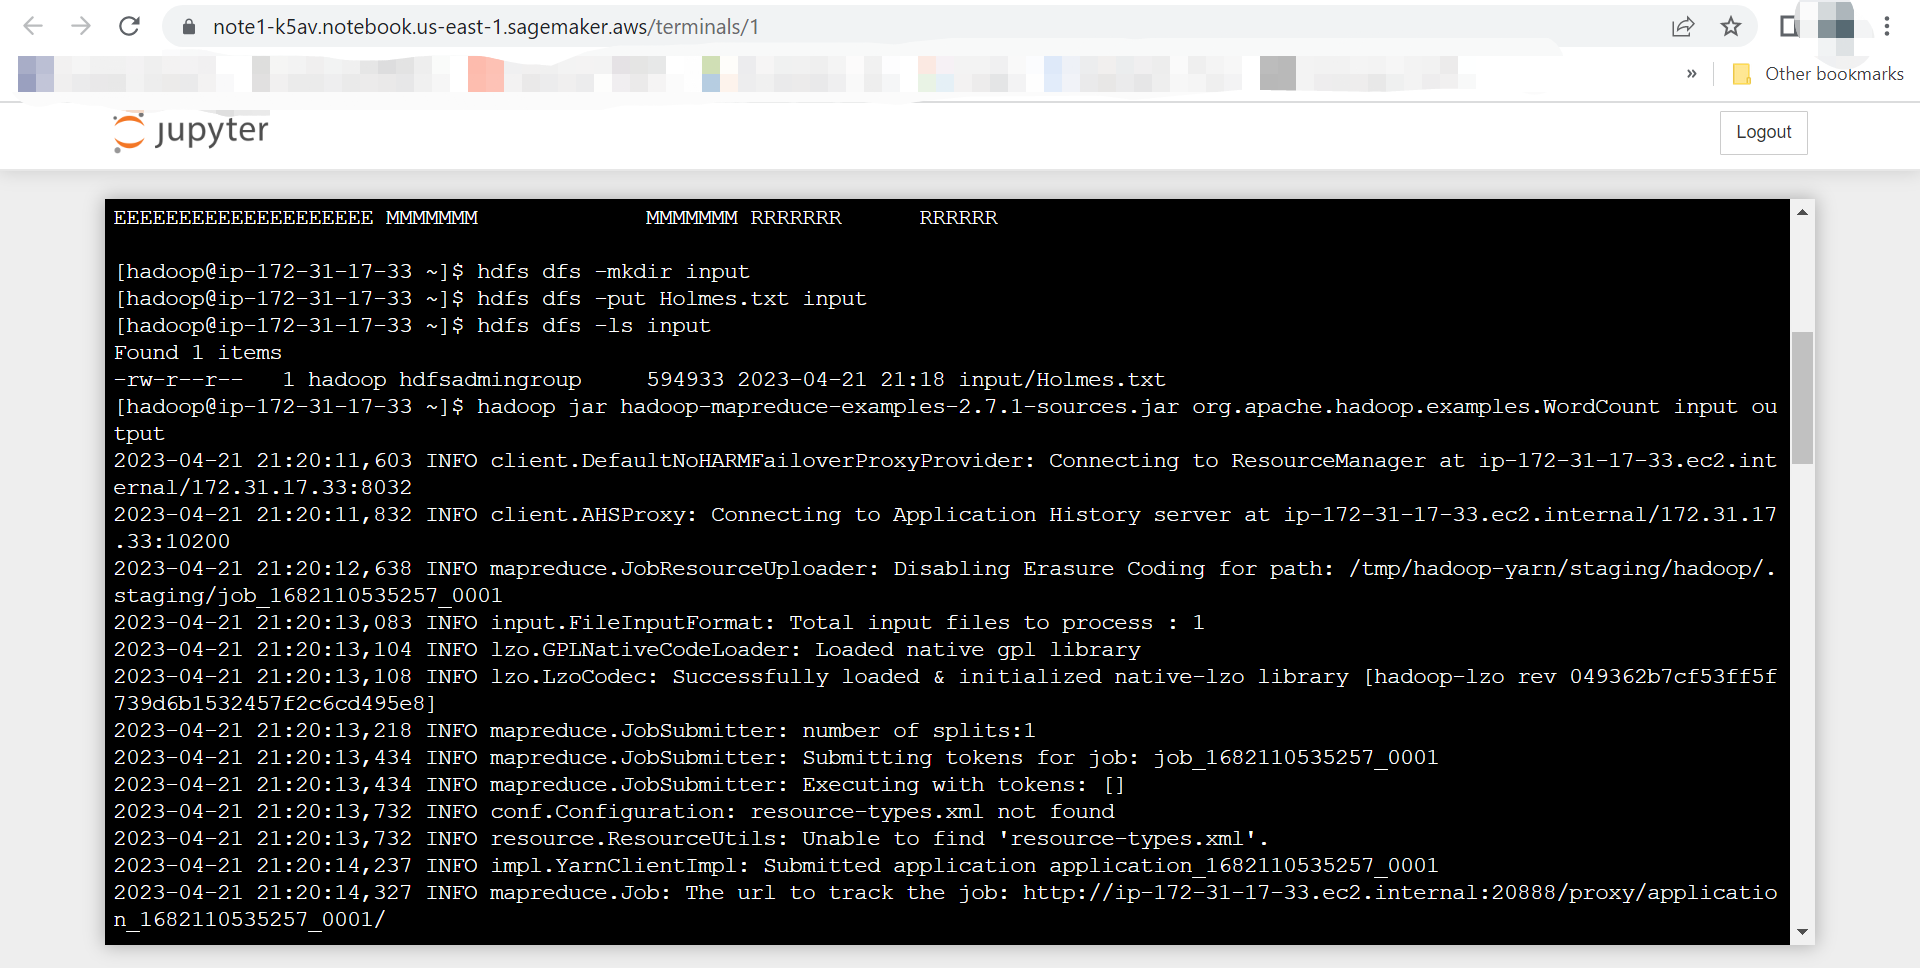

# Word Count

A common starting exercise for MapReduce is word count.

## terminal 1

(a) Run MapReduce. This command is running a program called hadoop. It is passing the command a number of parameters. It is telling hadoop that it should use the Java ARchive program specified. Within the archive, it should use the WordCount program. Finally the HDFS input and output folders (aptly named input and output) are specified.



In [ ]:
hadoop jar hadoop-mapreduce-examples-2.7.1-sources.jar org.apache.hadoop.examples.WordCount input output

(b) Check out your results

In [ ]:
hdfs dfs -ls output

(c) Copy the results from HDFS to the local file system on the primary node. Type:



In [ ]:
hdfs dfs -get output

(d) You can have a look at some of the results by typing:

In [ ]:
head output/part-r-00001

(e) Using Linux commands, concatenate the contents of all your “part-r-” files into a new text file, sort
your new text file

In [ ]:
cat output/part* | sort >copy_Holmes.txt

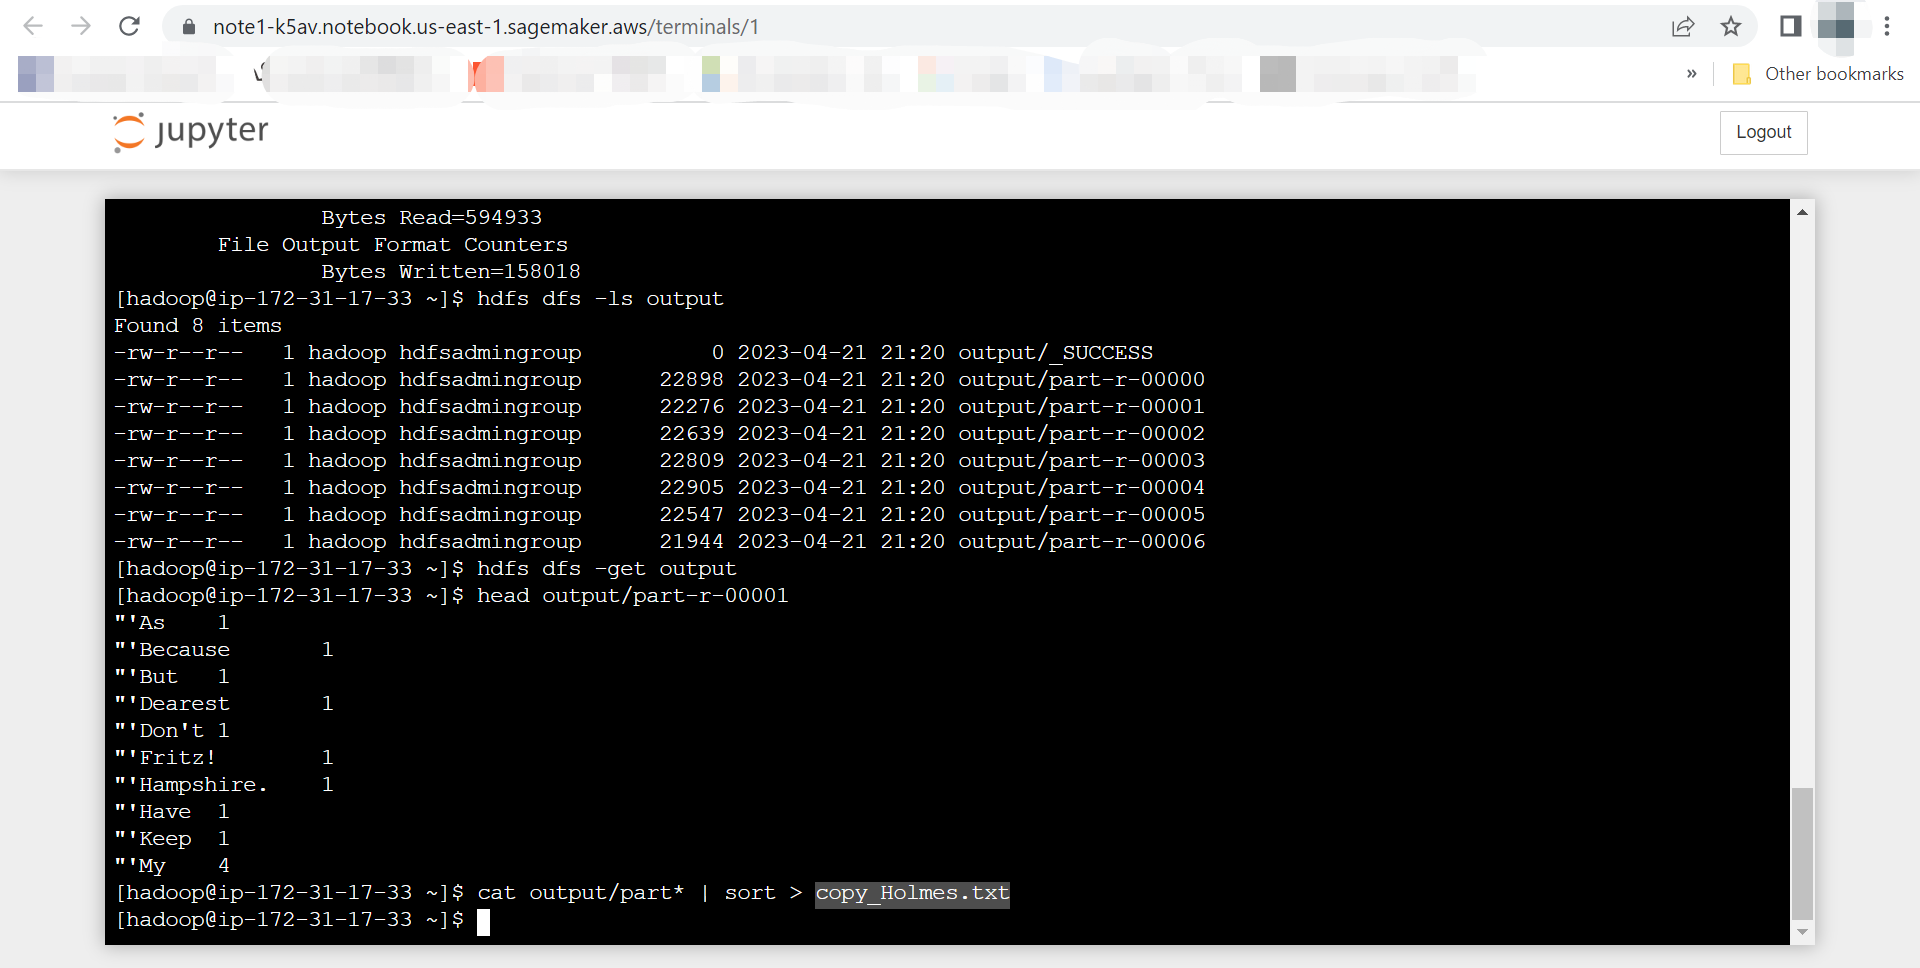

## terminal 2

Download the combined file

(a) To do this, you need to initiate the transfer from YOUR machine

(b) On your local terminal (Terminal 2) scp again to retrieve the desired files. Note the “.” at the end. This copies the specified file to “here,” your current location. 

In [ ]:
scp -i labsuser.pem hadoop@<yourDNShere>.compute-1.amazonaws.com:copy_Holmes.txt .

1682113791682.png

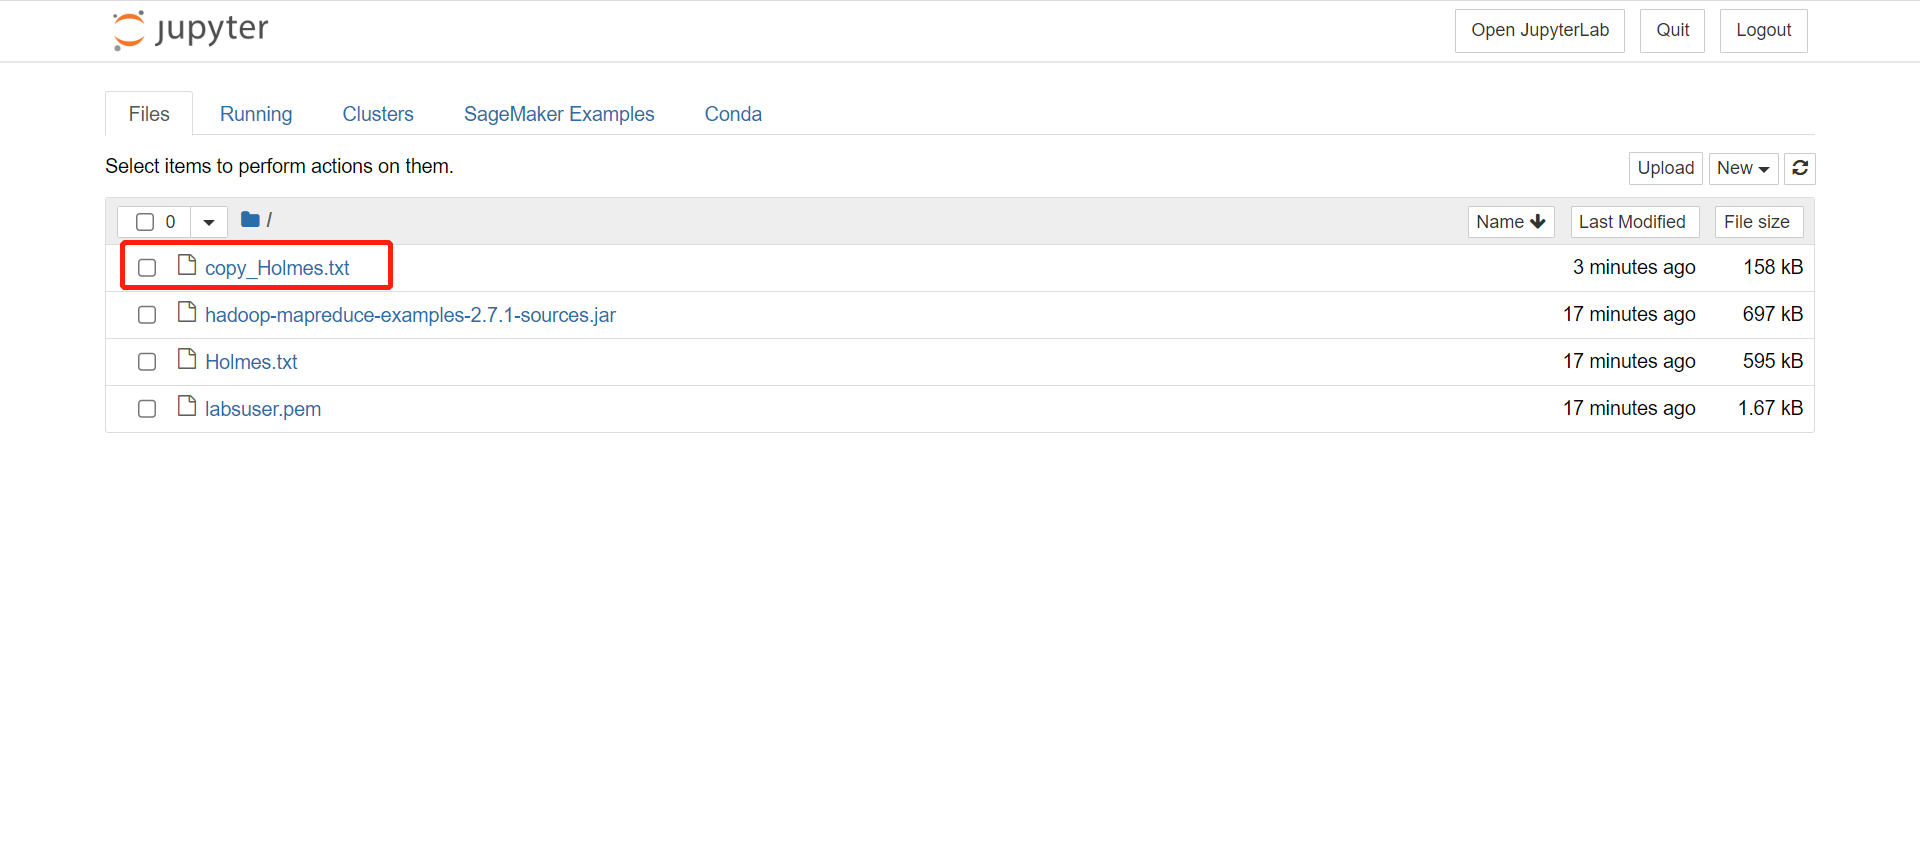

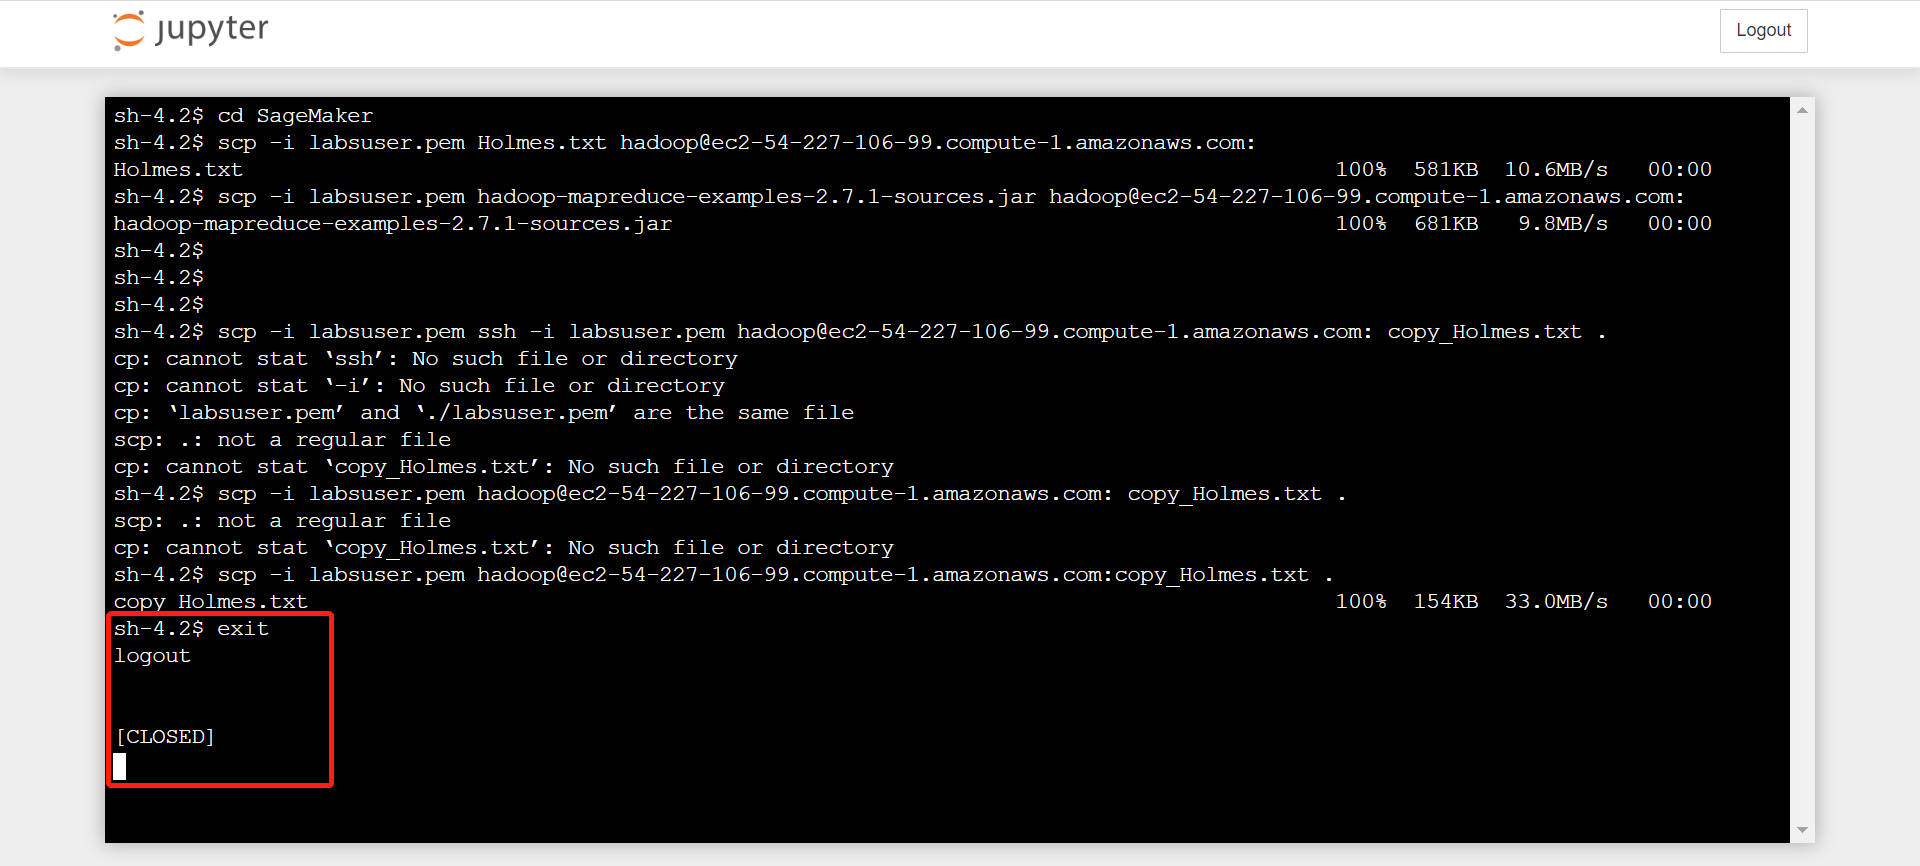

# SHUT DOWN YOUR CLUSTER, SageMaker instance, and Lab


Important: never leave your cluster up when you are not using it. You are using up credits!
1. While not required, it’s good practice to log out of the primary node
exit
2. See your list of clusters by clicking on “AWS”, then “EMR”
3. Select the line with your HDFS Lab cluster
4. Click the “Terminate” button
5. Confirm you want to terminate this cluster
6. Note: People have mixed results actually killing machines in this way. After you kill them, make sure
that they are dead. Click the cube, click “EC2” and click “Instances”. There should not be any. If
they are still there, click the checkbox next to each of your machines, and under “Actions”-“Instance
State” choose “terminate”. Only log out after you have verified from the EC2 page that you have no
running instances.
7. To terminate a SageMaker instance:
(a) Return to SageMaker (From AWS SageMaker, if needed)
(b) Click on Notebook Notebook instances
(c) Select your notebook instance
(d) Select “Stop” from the “Actions” menu next to the orange “Create notebook instance” button
(e) Once you have a SageMake notebook instance, you can just start it up again to reuse it.
8. Stop your lab by clicking on “End Lab”

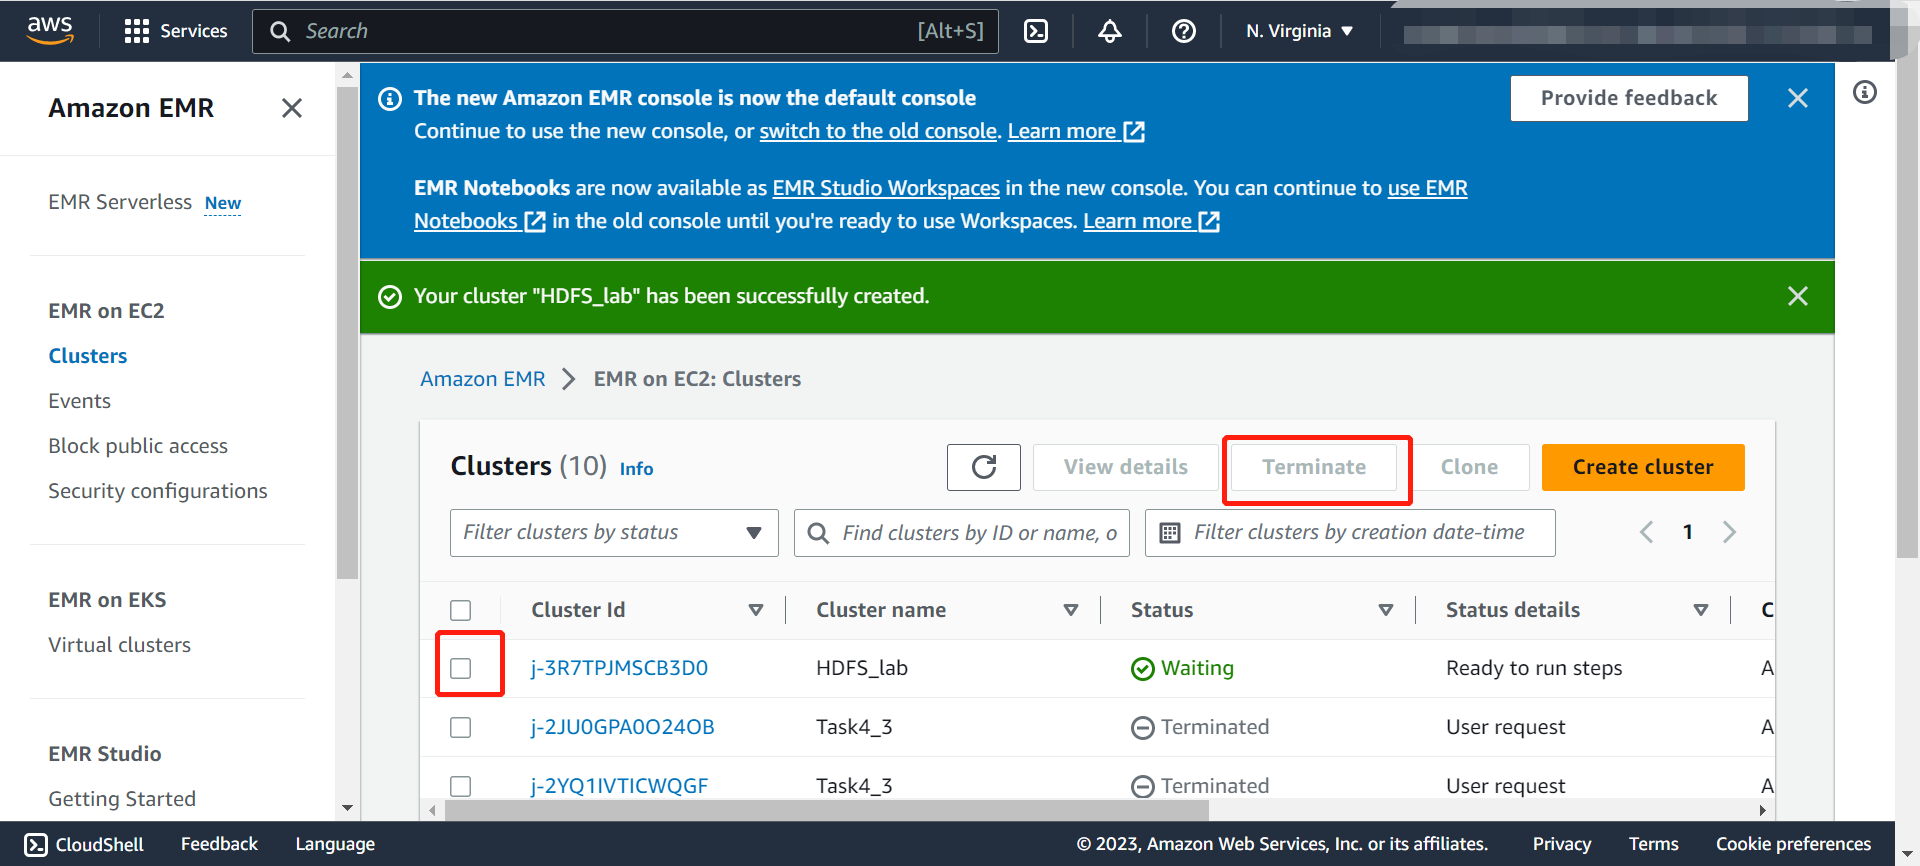

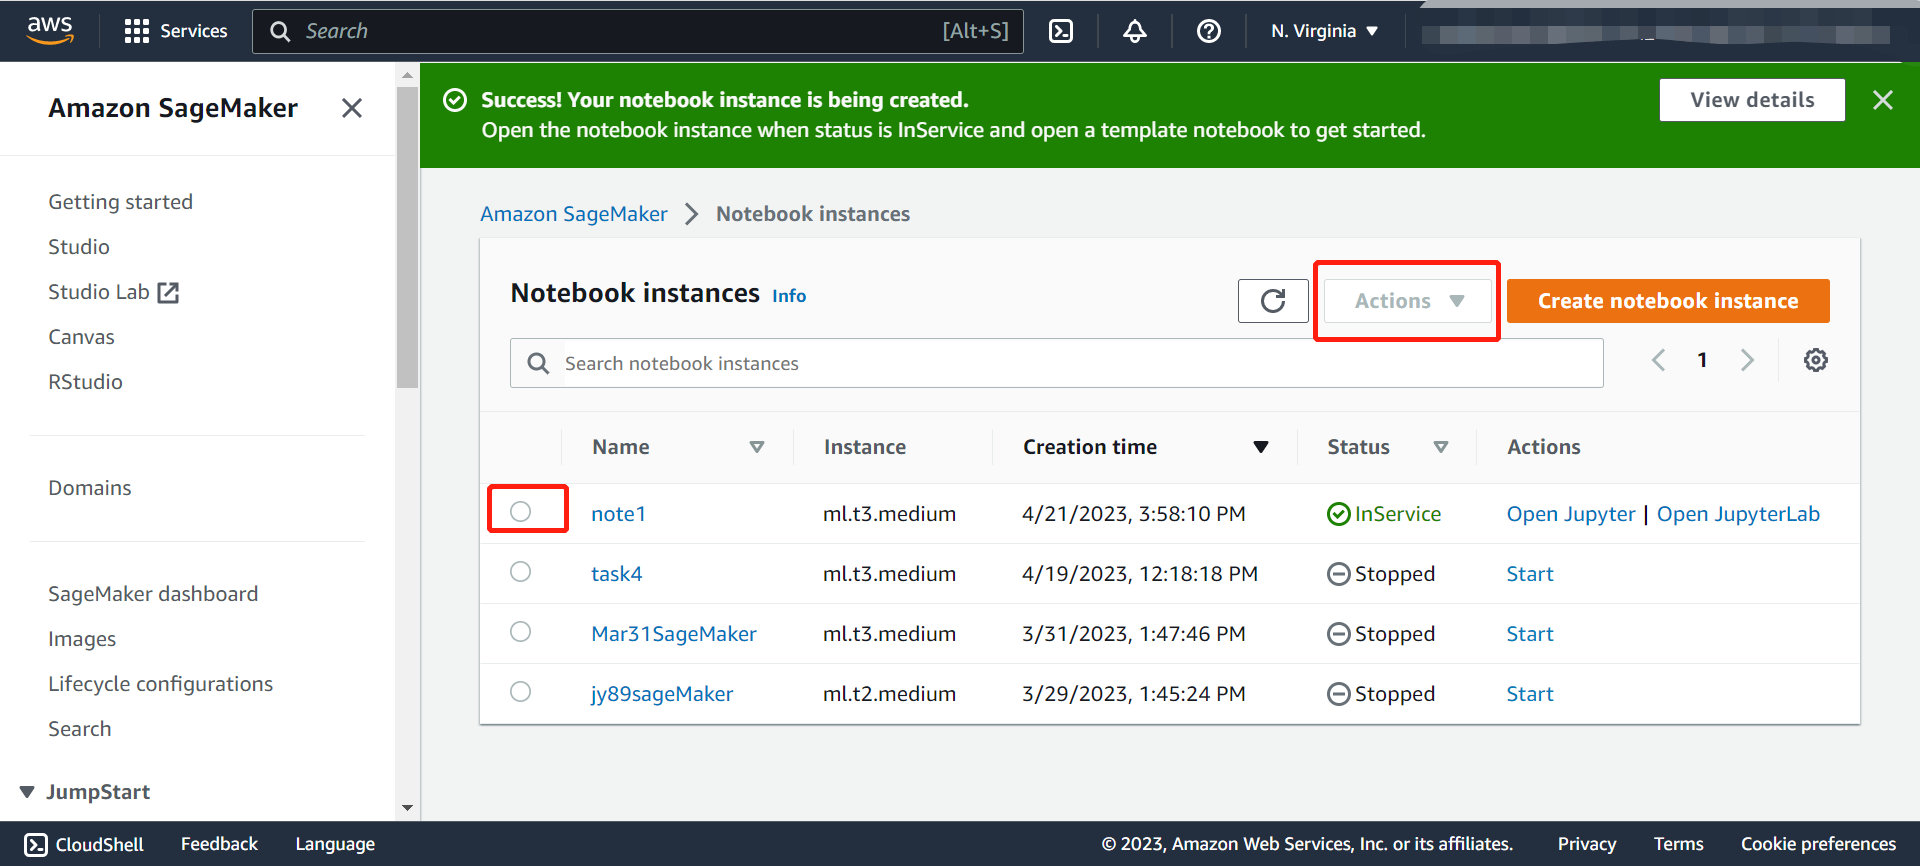

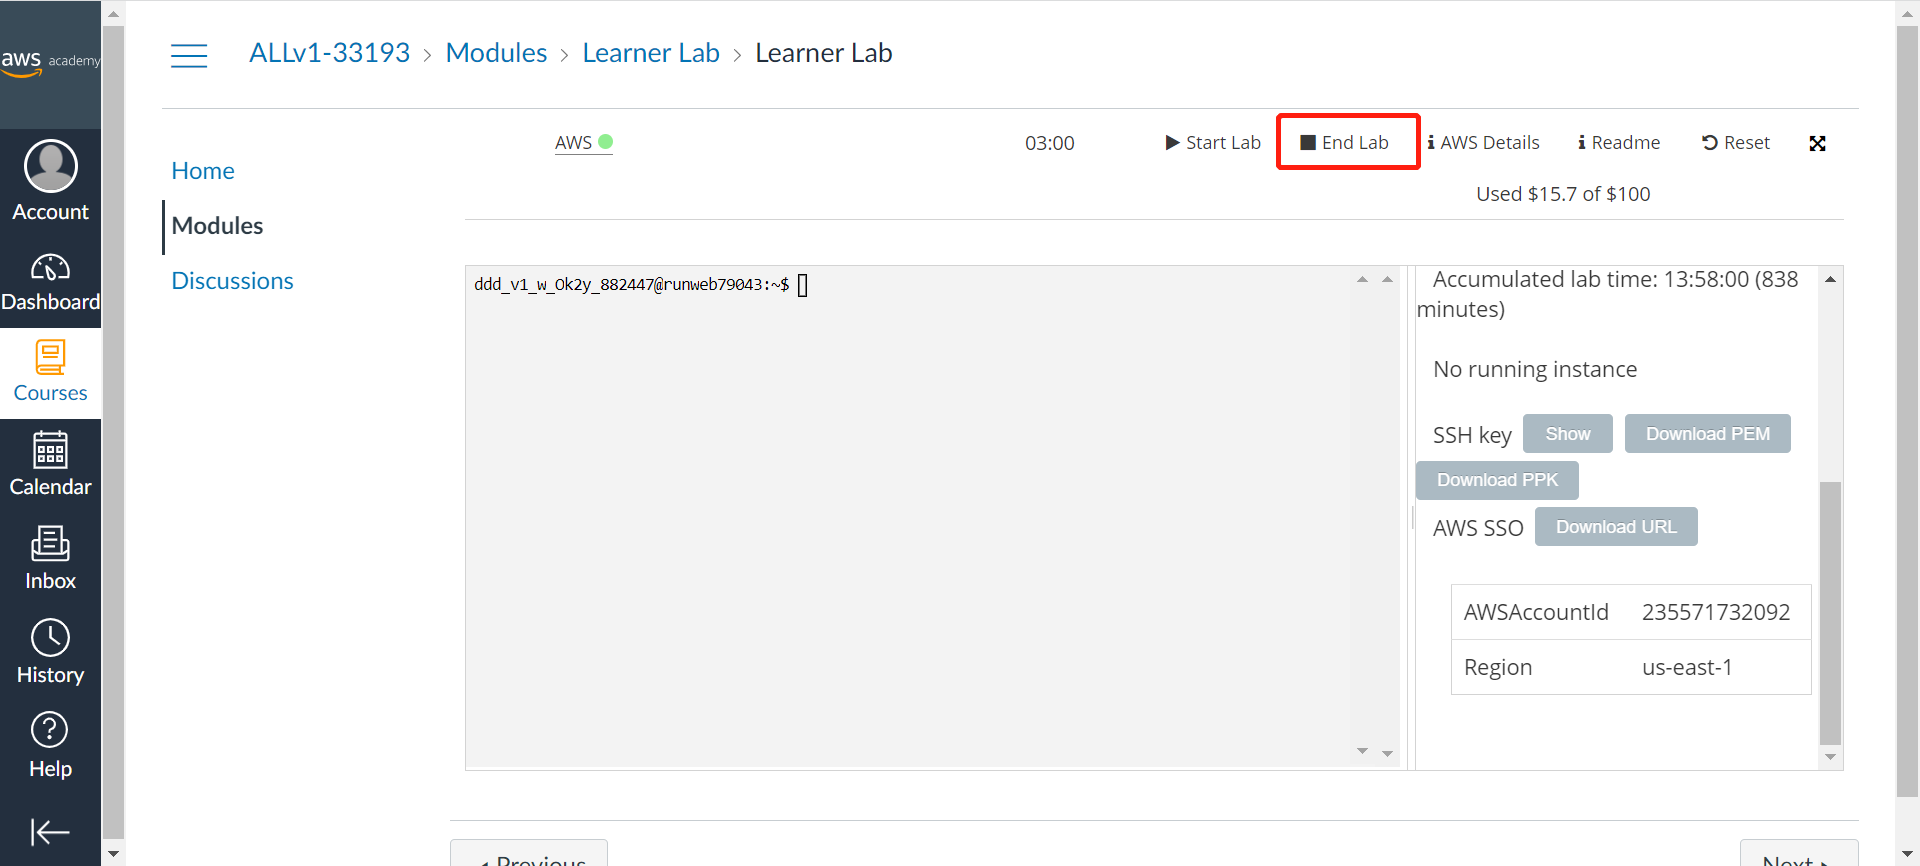